# Sentiment Analysis 2020 Election Tweets

# Project 1

## **Research Question:** *Quantifying public engagement toward political parties on twitter to predict election results*

### Introduction 
##### Social media platforms including Facebook, Instagram, and Twitter have altered how we share and communicate news and opinions regarding current affairs entirely. Twitter plays an integral part in the mainstream media and has allowed it to become a platform for electoral campaigning and the political discourse as a whole. Influential and powerful individuals and organizations including politicians, political parties, and news agencies have increased the use of Twitter to change public sentiment regarding current and public affairs. During the 2020 US presidential election campaign, millions of tweets were posted by users around the world. Fortunately, we have access to detailed information regarding these tweets by every individual to an extent where we can predict groundbreaking outcomes of the future. 
##### The data used in this particular research consist of the two primary election candidates, Donald Trump, and Joe Biden. We have separate data sets of tweets that contain their respective names. The tweet data was accessed from Kaggle which has been collected since October 2020 for approximately one month (24 days to be exact) till the election month of November 2020. There are many tools to measure the popularity of someone on platforms like Twitter. For instance, the number of tweets for each candidate could demonstrate their number of supporters. Similarly, the public engagement on these tweets like the number of retweets would indicate how well-known a particular tweet is and how often the message in that tweet is supported by others on the platform. Similarly, the number of likes on a particular tweet is another important variable to measure the popularity of a tweet and whether people favor a particular agenda or not. Moreover, the location origin of a tweet is of utmost importance since that would indicate whether the tweet count of a specific state within the US eventually dictates a relation between the real vote counts of the mentioned state and its ultimate result.
##### Unfortunately, the nature of tweets is ambiguous since it represents emotions and so, we must identify and categorize them. To analyze whether these opinions are in support or against the candidates, in this case, Biden or Trump, sentiment analysis is a tool typically chosen to approach such a problem. The goal of sentiment analysis is to understand the opinions of people. It analyzes emotions, opinions, and attitudes towards issues and uses natural language processing and machine learning techniques to automatically identify subjective information from text data and then categorize it into positive, negative, or neutral sentiments. 
##### Sentiment Analysis has been previously applied on tweets from the US 2012 Presidential Election (Mohammad, 2014) as well as the 2016 Presidential Election (Joyce, 2018). Moreover, not only in the US but sentiment analysis has also been conducted on tweets on the political tweets of UK (He, 2012), Spain (Rodriguez-ibanez, 2021) and India (Ansari, 2019). The goal of sentiment analysis is to understand the opinions of people. It analyzes emotions, opinions, and attitudes towards issues and uses natural language processing and machine learning techniques to automatically identify subjective information from text data and then categorize it into positive, negative, or neutral sentiments (Coletto, 2015). Deep learning has been implemented in sentiment analysis of political tweets as well (Pota, 2018). This paper takes a relevantly new approach to analyzing tweets in terms of time intervals, machine learning techniques including logistic regression models and regression trees to predict certain aspects of the tweets. A time-series analysis of tweets that contains different sentiments for the respective candidates, Trump and Biden, was also conducted. It indicated of how simple moving average models for different time windows of the sentiment scores can be related with real world events and how controversial incidents can impact electoral campaigns.
##### After working rigorously with the data sets, we observed how the likes, retweet counts, and user follower counts of tweets were positively related to the vote counts of most states in the United States via the number of tweets throughout the USA. It is very important to realize that we hypothesized that tweets with positive sentiments or emotions would have a positive correlation with vote counts in general.
##### When viewing the plots for each candidate, we observed how a weaker association in our regression meant a higher public engagement on the social media platform. We saw that Biden for all our independent variables had a much higher public engagement. This can be because our data set contains a much larger number of tweets that relates to Biden compared to Trump. This resulted in outliers in the Biden data set which unfortunately made our results less clear and more skewed in general. 
##### Moreover, we mapped the mean positive and negative sentiment scores for the tweets along with the voter turnout (vote-to-population ratio) by state for each candidate. It did uphold our expectations as we expected, a high positive score for a candidate would suggest that they would win in that state. Similarly, a high average negative sentiment in a state for a candidate eventually meant that we would expect a loss for them. Although this was true in the majority of cases, some outlier states were also spotted in both instances. One interesting relation we observed during the research was how COVID-19 affected the 2020 election results. In particular, Biden had better health policies and reforms compared to Trump and so, the states which were hit by COVID-19 the hardest in terms of daily cases preferred to vote for Biden. 
##### Finally, we observed through our regression results that the number of tweets for each state had a strong positive relationship with the number of votes each candidate received which confirmed our hypothesis. We assumed that the number of tweets was dependent on the engagement on the platform but unfortunately, there was a very weak relation between tweet count with variables like retweet counts and there was some other external unknown factor involved. Nevertheless, our results were statistically consistent with the election results where Biden won in most states as predicted becoming the next President of the United States of America.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import re # importing regex to filter tweets
import nltk # improting natural language tool kit which contains the sentiment analyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# analyzer in the pre-built vader model to detect text polarity
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import plotly.express as px
import plotly.graph_objs as go
import collections
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
# way to include images of maps!
from IPython import display
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Data Loading and Wrangling

##### Reading the csv files for both the election candidates, Donald Trump and Joe Biden

In [2]:
dft = pd.read_csv(r'C:\Users\danis\Desktop\University of Toronto\Winter 2023\ECO225H1\ECO225Project\data\hashtag_donaldtrump.csv', lineterminator = '\n')

In [3]:
dfb = pd.read_csv(r'C:\Users\danis\Desktop\University of Toronto\Winter 2023\ECO225H1\ECO225Project\data\hashtag_joebiden.csv', lineterminator = '\n')

##### Concatenating/combining both the Donald Trump and Joe Biden Data Sets 

In [4]:
# We add a new column of the candidate name to both the data sets to keep them distinct
dft["Candidate Name"] = "Donald Trump"
dfb["Candidate Name"] = "Joe Biden"
trump_biden_data = pd.concat([dft, dfb]) # We now merge or concatenate both the data sets


##### We check the countries from where the tweets have been collected by the author of the data sets

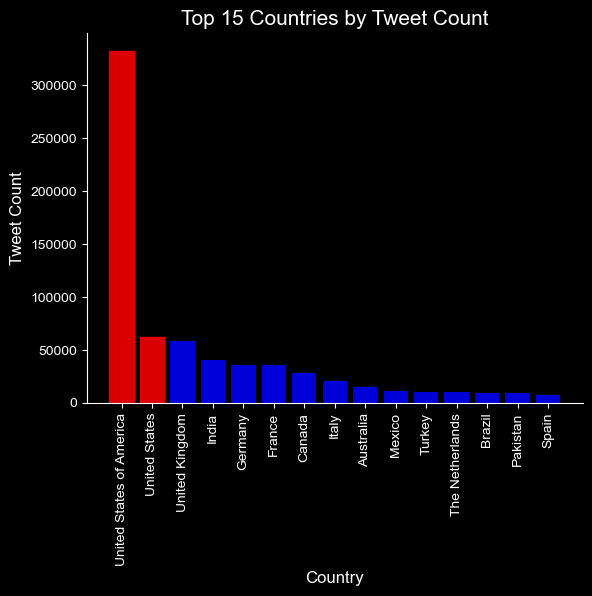

In [5]:
name_check = pd.DataFrame(data = trump_biden_data.groupby('country')['tweet'].count().sort_values(ascending=False).head(15))
name_check = name_check.reset_index()
ax = plt.bar(x = 'country', height = 'tweet', color = 'blue', alpha = 0.85, data = name_check)
ax[0].set_color('red')
ax[1].set_color('red')
plt.xlabel('Country', fontsize = 12)
plt.xticks(rotation=90)
sns.despine()
plt.title("Top 15 Countries by Tweet Count", fontsize=15)
plt.ylabel("Tweet Count", fontsize=12)
sns.set_theme(rc = {'xtick.labelsize' : 12.0})
sns.set_style('white')

##### We observe that there are tweets from other countries other than the the US so we further clean the country column and keep the tweets which are from the US. Moreover, observe that the first two bars both represents tweets from the USA so, we must keep both of them as one country

In [6]:
trump_biden_data = trump_biden_data.loc[(trump_biden_data['country'] == "United States") | (trump_biden_data['country'] == "United States of America")] 
trump_biden_data.isna().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                      20
user_id                      0
user_name                    1
user_screen_name             0
user_description         23618
user_join_date               0
user_followers_count         0
user_location                0
lat                          0
long                         0
city                    201791
country                      0
continent                    0
state                    61933
state_code               61933
collected_at                 0
Candidate Name               0
dtype: int64

In [7]:
trump_biden_data = trump_biden_data[(trump_biden_data['state'] != 'Guam')]
trump_biden_data = trump_biden_data[(trump_biden_data['state'] != 'Puerto Rico')]

##### After all the data wrangling we finally check whether if there are any important columns that contains the NaN values so we could remove them as well. Since, state name is an integral part of the research question we remove all the tweets that does not contain the state name. Note that although city and user description have NaN values, we still keep those tweets as they do not hinder our research. 

In [8]:
trump_biden_data = trump_biden_data.dropna(subset = 'state') # we remove the tweets with na values in the state column

##### There can be numerous tweets that can be in both the data sets given that there is a possibilty that tweets may contain both Biden and Trump names. We have to account for the repeated tweets after both the sets were concatenated and remove them

In [9]:
trump_biden_data = trump_biden_data.drop_duplicates(subset = 'tweet', keep = False)

##### Lastly, we must remove all the tweets that were tweeted after the election poll that was held on November 3rd 2020. We would only account tweets that were tweeted prior the actual election to accurately predict the election results

In [10]:
trump_biden_data = trump_biden_data.loc[(trump_biden_data['created_at'] < '2020-11-03 24:00:00')] # only keeps the observations until the day of election which was November 3rd 2020

##### To further progress in the project, identifying sentiment state for each tweet was crucial. For that purpose, the tweet data had to be thoroughly cleaned because the sentiment intensity analyzer we use only allows plain text data. Unfortunately, our tweet messages were far from clean and contained a lot of data which was not acceptable to the analyzer. For this purpose regex (regular expressions) was imported to clean each tweet in the combined data set.

##### The following code cleans the tweet messages very carefully and leaves us with a clean and plain textual sentence. We define a function that takes in a string of characters. It then turns every letter into lower case. It then removes all the apostrophes from the string, removes # hashtags in the beginning, middle or at the end of a tweet. Similarly, it removes the @ mentions in a similar way that maybe used inside a tweet. The function then removes any sort of punctuations including commas, question mark and exclamation mark. Furthermore, it removes any mentioned links and websites that starts with 'https'. It then splits all the words into a list to check for stop words from a pre-specified list and remove them respectively from the list. Stop words are words in a sentence that are of no importance and which does not bring any new meaning to the message. Once stop words are removed from the list of words, they are then joined back again as a sentence ready for further analysis.

In [11]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from",
"put", "rather", "said", "same", "ask", "about"] # randomly made a list of some words considered to be unuseful
def clean_tweet(tweet):
    clean = tweet.lower() # lowercasing all the letters in the tweet
    clean = re.sub("'", "", clean) # removing ' from tweets
    clean = re.sub("#[A-Za-z0-9_]+","", clean) # removing hashtags 
    clean = re.sub("@[A-Za-z0-9_]+","", clean) # removing mentions
    clean = re.sub('[()!?]', ' ', clean) # removing punctuations including commas, 
                                       # exclamation marks question marks etc
    clean = re.sub('\[.*?\]',' ', clean) 
    clean = re.sub(r'http\S+', '', clean) # removing any website links
    clean = re.sub("[^a-z0-9]"," ", clean) # removes all non-alphabetic 
                                         #letters and keeps alphabetic and numbers 
    clean = clean.split() # splits the tweet string into a list
    clean = [word for word in clean if not word in stopwords] # comprehension to remove any stopwords from the list
    clean = " ".join(word for word in clean) # joins back all the words from the list as a sentece
    return clean
  

##### We now create a new column in our data set for the cleaned tweet and apply our defined function on every tweet in our data set. 

In [12]:
trump_biden_data['clean'] = trump_biden_data['tweet'].apply(lambda x: clean_tweet(x))  

##### In this project, we use a lexicon based sentimental analysis is through VADER (Valence Aware Dictionary and Sentiment Reasoner) that automatically identifies the sentiment of a text based on words and slangs. The function SentimentIntensityAnalyzer is present in the natural language toolkit (NLTK) of python that processes our cleaned data.

##### We now apply the pre-defined sentiment intensity analyzer function on our cleaned tweets. We created a new column for the polairty score for each tweet. This simply calculates the polarity scores of each tweet between negative, neutral and positive. We then observe the compund score, the addition of all scores of the three categories. We then set a criteria in terms of the score whether If the compound is closer to +1 then the tweet is positive while if it is closer to -1 then it would be considered negative. 

In [13]:
sent_analyzer = SentimentIntensityAnalyzer() # assigning the analyzer to a variable
trump_biden_data['polarity_score'] = trump_biden_data['clean'].apply(lambda x: sent_analyzer.polarity_scores(x))
# creating the sentiment column and using the analyzer on the cleaned tweets to calculate polarity scores

##### The compound score is being categorized between positive, neutral or negative. As mentioned before, a positive compound score will be considered a positive tweet and any compound score that is negative will be considered negative tweet. 

In [14]:
def emotion_state(sentiment_score):
  """
  This function takes in the sentiment score values and identifies what emotion does the score refers to
  between the 3 general states of Positive, Negative and Neutral 
  """
  if sentiment_score['compound'] >= 0.05: # creating a threshold of positive tweets for the polarity scores 
    return "Positive"
  elif sentiment_score['compound'] <= -0.05: # creating a threshold of negative tweets for the polarity scores
    return "Negative"
  else:
    return "Neutral" 


##### This is the most important part of our code to continue our analysis. We pick all the tweets that has a positive sentiment. As mentioned in the introduction we assumed that the all engagement on positive tweets should have a positive relationship with the vote counts of a particular state. 
##### Note that this dataset still contains both the candidates' tweets.

In [15]:
trump_biden_data['Sentiment'] = trump_biden_data['polarity_score'].apply(lambda x: emotion_state(x)) # applying the function and categorozing each tweet in the data set

##### The following code separates all the tweets that were positive and store them in one data frame while all the negative tweets are stored in another data frame of both the candidates.

In [16]:
only_positive = trump_biden_data.loc[trump_biden_data['Sentiment'] == 'Positive']
only_negative = trump_biden_data.loc[trump_biden_data['Sentiment'] == 'Negative']

##### The following code reads the data from the Election Results Data set. This is the president county data set with the candidate names along with it. After reading the csv file, we only kept the observations with Joe Biden and Donald Trump and remove all other candidates. We then categorized the data set with state and candidate and changed the column name for merging convenience.

In [17]:
results = pd.read_csv(r"C:\Users\danis\Desktop\University of Toronto\Winter 2023\ECO225H1\ECO225Project\data\president_county_candidate.csv")
results = results.loc[(results['candidate'] == "Joe Biden") | (results['candidate'] == 'Donald Trump')]
tvbs = results.groupby(['state', 'candidate']).sum('total_votes')
tvbs = tvbs.reset_index()
tvbs.rename(columns = {'candidate':'Candidate Name'}, inplace = True)


##### We now merge our dataset (tvbs) that contains total votes by state with the data frames with only positive tweets and only negative tweets respectively. We calculated the averages of our independent variables like retweet counts and likes in those states from the new data frames.  

In [18]:
merge_pos_vote = pd.merge(only_positive, tvbs, on = ['state', 'Candidate Name'])
mean_pos_table = merge_pos_vote.groupby('state').mean()
merge_neg_vote = pd.merge(only_negative, tvbs, on = ['state', 'Candidate Name'])
mean_neg_table = merge_neg_vote.groupby('state').mean()

## Summary Statistics Tables

##### The following summary statistics table shows detailed information regarding retweets of the tweets that mentions both the election candidates, Joe Biden and Donald Trump. Firstly, the number of observations for Biden is much lower than Trump. Yet, we see that the mean retweet for Joe Biden is higher than Donald Trump. This is because there are more retweets of the tweets with Biden mentioned compared to Trump. Moreover, the maximum number of retweets on a single tweet relating to Joe Biden is 3 times larger than of the maximum from the tweets which mentions Trump. This significance further shows to be true since the standard deviation of the retweets of Biden is double of that of Trump's, meaning that the retweets are more spread out and much far from the mean when compared to Trump's retweet data. This shows high variability of retweet counts in tweets relating to Biden. It is evident through the retweets that Biden's message and campaign is more cirulating and much stornger.

In [19]:
trump_biden_data.groupby('Candidate Name')["retweet_count"].sum()

Candidate Name
Donald Trump    212546.0
Joe Biden       267398.0
Name: retweet_count, dtype: float64

In [20]:
trump_biden_data.groupby('Candidate Name')["retweet_count"].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,104155.0,2.040670,42.554416,0.0,0.0,0.0,0.0,5986.0
Joe Biden,76632.0,3.489378,85.341246,0.0,0.0,0.0,0.0,17652.0


##### We categorize all the positive tweets between candidate names and now obseerve the number of retweet counts once again. We observe how the number of retweet counts has decreased after extracting only positive tweets. Nevertheless the average number of likes for Joe Biden has increased from 3.48 to 4 when compared to mixed sentiment from earlier. Biden's standard deviation remains high in the only positive tweets as well. Infact it is three times more high than Trump's deviation. This indicates that Biden's positive tweets are much more impactful and encouraging in general when compared to Trump's.

In [21]:
only_positive.groupby('Candidate Name')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,34773.0,2.300664,39.715792,0.0,0.0,0.0,0.0,3243.0
Joe Biden,27118.0,4.041707,119.821023,0.0,0.0,0.0,0.0,17652.0


##### The table below shows the aforementioned information where there is a higher number of tweets of Donald Trump than Joe Biden. Moreover, the total number of likes with Joe Biden tweets is higher than Trump's total likes. This leads to the obvious conclusion that the average number of likes received by Biden tweets is higher than Trump's tweeets as shown in the table. It is quite spectacular to observe that the maximum number of likes on a single tweet of Biden is almost seven times more than any tweet that mentions Trump. This clearly indicates Biden's popularity in general.

In [22]:
trump_biden_data.groupby('Candidate Name')["likes"].sum()

Candidate Name
Donald Trump     777191.0
Joe Biden       1035446.0
Name: likes, dtype: float64

In [23]:
trump_biden_data.groupby('Candidate Name')["likes"].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,104155.0,7.461869,173.643278,0.0,0.0,0.0,1.0,25987.0
Joe Biden,76632.0,13.511927,695.563695,0.0,0.0,0.0,1.0,165702.0


In [24]:
trump_biden_data.groupby('Candidate Name')["likes"].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,104155.0,7.461869,173.643278,0.0,0.0,0.0,1.0,25987.0
Joe Biden,76632.0,13.511927,695.563695,0.0,0.0,0.0,1.0,165702.0


##### We categorize all the positive tweets between candidate names and see the number of likes once again. We observe how the number of tweets has decreased after extracting only positive tweets. Nevertheless the average number of likes for Joe Biden has increased from 13 to 17 when compared to mixed sentiment. Biden's standard deviation still remains high in the only positive tweets as well. We can also see that the highest number of likes on a Biden tweet is ten times more than of any positive tweet related to trump. This may indicate that Biden's message is more powerful or patriotic on the social media platform.

In [25]:
only_positive.groupby('Candidate Name')['likes'].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,34773.0,8.778190,171.045578,0.0,0.0,0.0,1.0,16154.0
Joe Biden,27118.0,17.696327,1047.403007,0.0,0.0,0.0,2.0,165702.0


##### Note that the total user follower count and number of tweets both for Biden are lower than Trump. Still, people who tweeted about Biden have a higher average following on Twitter than the users who tweeted about Trump. Although user with Trump tweets has a higher number of total followers, there is one speicific user who has the highest follower count that tweeted about Biden that was higher than any person who tweeted about Trump with about 5.7 million followers (FYI: It is Perez Hamilton). It is worth mentioning the interquartile ranges for user followers variable for each candidate. The inter-quartile range (IQR) for trump user follower is 2548 while Biden's IQR is 2869. Biden's higher IQR indicates the higher dispersion of followers count which can also be observed by a higher standard deviation of followers of Biden supporters.

In [26]:
trump_biden_data.groupby('Candidate Name')["user_followers_count"].sum()

Candidate Name
Donald Trump    882677497.0
Joe Biden       760937285.0
Name: user_followers_count, dtype: float64

In [27]:
trump_biden_data.groupby('Candidate Name')["user_followers_count"].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,104155.0,8474.653132,81261.428768,0.0,138.0,694.0,2685.0,4163175.0
Joe Biden,76632.0,9929.758913,87360.647876,0.0,143.0,789.0,3020.0,5750841.0


##### Note that the total user follower count and number of tweets both for Biden are lower than the original one with all sentiments and still lower than trump. Nevertheless, people who tweeted about Biden still have a higher mean following on Twitter when compared to Trump. Moreover, Biden's standard deviation remains higher than trump in the number of followers who supports Biden.

In [28]:
only_positive.groupby('Candidate Name')['user_followers_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,34773.0,7485.942283,63969.466534,0.0,136.0,681.0,2594.00,4163175.0
Joe Biden,27118.0,9499.334944,88917.726314,0.0,146.0,782.5,2911.75,5750841.0


## Plots and Figures

##### The following code extracts out the tweets with the highest average number of likes by state name for each candidate. We then compare both the candidates likes wise based on the state with a bar plot.

In [29]:
top20_likes = only_positive.groupby('state')['likes'].mean().sort_values(ascending = False).head(20).index.tolist()
pos_table_likes = only_positive.groupby(['state', 'Candidate Name'])['likes'].mean().reset_index()
pos_table_likes = pos_table_likes[pos_table_likes['state'].isin(top20_likes)]

##### The code outputs the highest mean number of likes for all positive tweets of the top 20 states by Candidates. We observe that NewYork has the highest number of likes on average for Joe Biden positive tweets. It is not a coincidence that Joe Biden infact did win in NewYork and the District of Columbia while Trump won in Indiana where he had a higher number of likes on positive tweets 

In [30]:
my_palette = {'Donald Trump': 'red', 'Joe Biden': 'blue'}

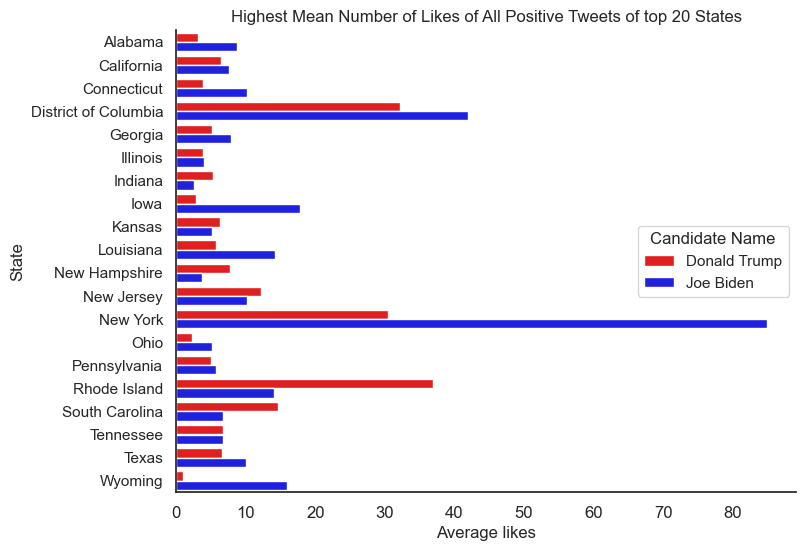

In [31]:
plot_follower = sns.barplot(
    data=pos_table_likes,
    x='likes',
    y='state',
    hue='Candidate Name',
    palette=my_palette  
)

# Set title and axis labels
plot_follower.set(
    title='Highest Mean Number of Likes of All Positive Tweets of top 20 States',
    xlabel='Average likes',
    ylabel='State'
)

# Removing spines
sns.despine()

# Move legend to center right
sns.move_legend(plot_follower, 'center right')

# Set figure size and style
plot_follower.figure.set_size_inches(8, 6)
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False}
)

##### The following code extracts out the tweets with the 20 highest number of retweet count by state name for each candidate. We then compare both the candidates retweet counts wise based on the state with a bar plot.

In [32]:
top20_retweets = only_positive.groupby('state')['retweet_count'].mean().sort_values(ascending = False).head(20).index.tolist()
pos_table_retweets = only_positive.groupby(['state', 'Candidate Name'])['retweet_count'].mean().reset_index()
pos_table_retweets = pos_table_retweets[pos_table_retweets['state'].isin(top20_retweets)]

##### The code outputs the highest average number of retweets for all positive tweets of the top 20 states by Candidates. We observe that NewYork and District of Columbia has the highest number of average retweet counts for Joe Biden's positive tweets. It is not a coincidence as we will see that Joe Biden infact did win in NewYork and the District of Columbia. Similarly, Trump won in South carolina where he had a higher average number of retweet counts on his positive tweets 

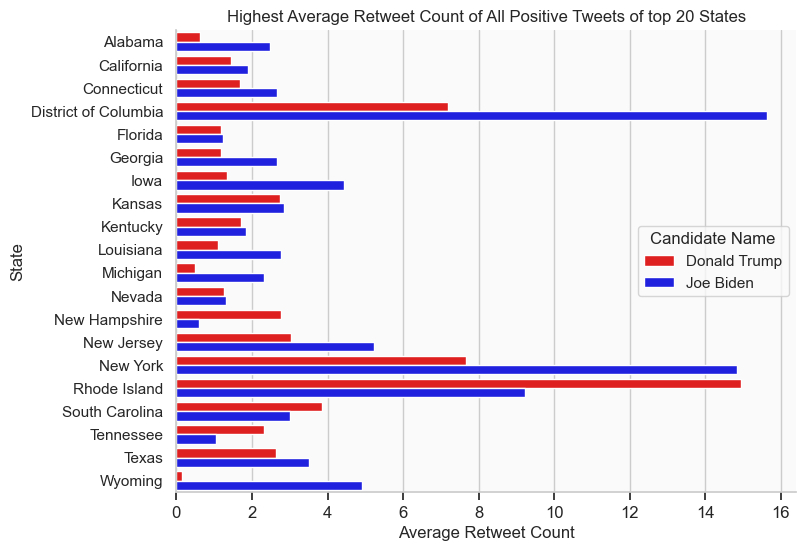

In [33]:
plot_follower = sns.barplot(
    data=pos_table_retweets,
    x='retweet_count',
    y='state',
    hue='Candidate Name',
    palette=my_palette  
)

# Set title and axis labels
plot_follower.set(
    title='Highest Average Retweet Count of All Positive Tweets of top 20 States',
    xlabel='Average Retweet Count',
    ylabel='State'
)

# Removing spines
sns.despine()

# Move legend to center right
sns.move_legend(plot_follower, 'center right')

# Set figure size and style
plot_follower.figure.set_size_inches(8, 6)
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False}
)

##### The following code extracts out the tweets with the highest number of user follower count by state name for each candidate. We then compare both the candidates retweet counts wise based on the state with a bar plot.

In [34]:
top20_follower = only_positive.groupby('state')['user_followers_count'].mean().sort_values(ascending = False).head(20).index.tolist()
pos_table_follower = only_positive.groupby(['state', 'Candidate Name'])['user_followers_count'].mean().reset_index()
pos_table_follower = pos_table_follower[pos_table_follower['state'].isin(top20_follower)]

##### We plot the barplot and observe a similar trend particularly regarding NewYork and District of Columbia. However, we see that New Jersey has a lot of user followers with positive tweets yet it was Biden who won the election in New Jersey. Note how there is an average of 40000 twitter user followers for Biden positive tweets in District of Columbia.  

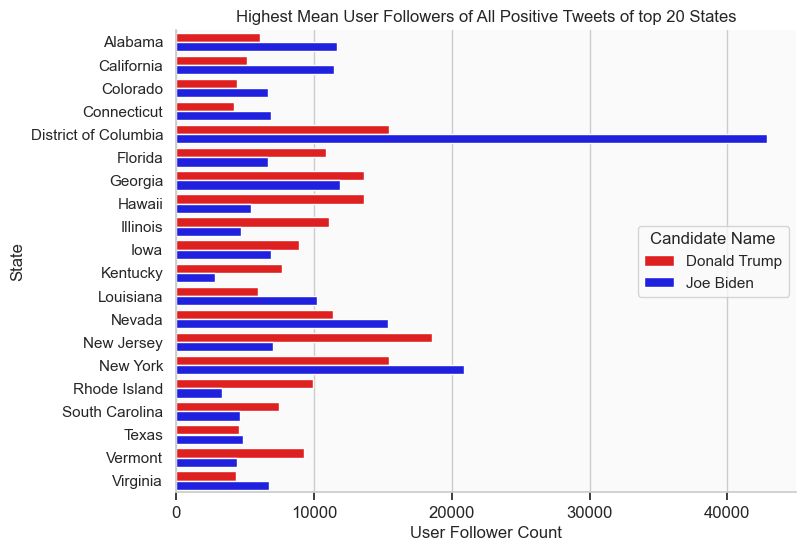

In [35]:
plot_follower = sns.barplot(
    data=pos_table_follower,
    x='user_followers_count',
    y='state',
    hue='Candidate Name',
    palette=my_palette  
)

# Set title and axis labels
plot_follower.set(
    title='Highest Mean User Followers of All Positive Tweets of top 20 States',
    xlabel='User Follower Count',
    ylabel='State'
)

# Removing spines
sns.despine()

# Move legend to center right
sns.move_legend(plot_follower, 'center right')

# Set figure size and style
plot_follower.figure.set_size_inches(8, 6)
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False}
)

#### Total Votes VS Average Likes by State
##### Notice how we observe a general positive corelation between average likes and total vote counts for most states.  Nevertheless, we can comfortably assert that there is a weak association between both the variables. There are some states which can be considered outliers and be removed. Moreover, if we look closely on the bottom left, there is a cluster which would indicate that both of them are indeed related to each other. The addition of the linear regression line complements the positive relation even more between the average likes and total votes. Note that all dots represent a specific state.

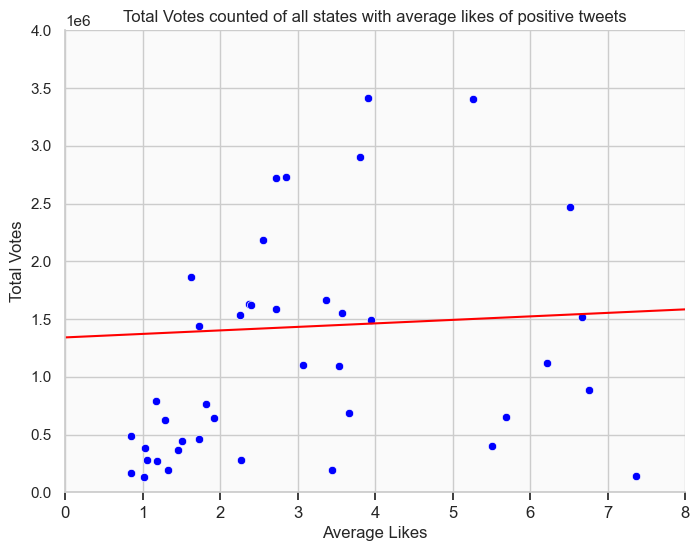

In [36]:
x = mean_pos_table['likes'].values.reshape(-1,1)
y = mean_pos_table['total_votes'].values.reshape(-1,1)
plot_avg_likes = sns.scatterplot(data = mean_pos_table,x = 'likes', y = 'total_votes', legend = False, color = 'blue')
plot_avg_likes.set(title = 'Total Votes counted of all states with average likes of positive tweets',xlabel= 'Average Likes', ylabel = 'Total Votes', xlim=(0, 8), ylim = (0, 4000000))
lr.fit(x,y)
x = np.linspace(0.0, 8.0).reshape(-1, 1)
y_pred = lr.predict(x)
plot_avg_likes.plot(x, y_pred, color = 'red')
sns.despine()
plot_avg_likes.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})

#### Total Votes vs Average Retweet Count
##### In this scatter plot we can observe a general positive corelation between average retweet counts and total vote counts for most states. Moreover, there is a weak association between both the variables meaning that some states do not follow the general trend strictly. So, there can be some states which can be considered outliers and be removed. Moreover, if we look closely on the bottom half of the plot, there is a cluster which would indicate that both variables are corelated to each other. The linear regression line also depicts the positive relation between the average retweet count and total votes. It may even be possible that the variables would perhaps have non-linear relationship. Note that all dots represent a specific state
 

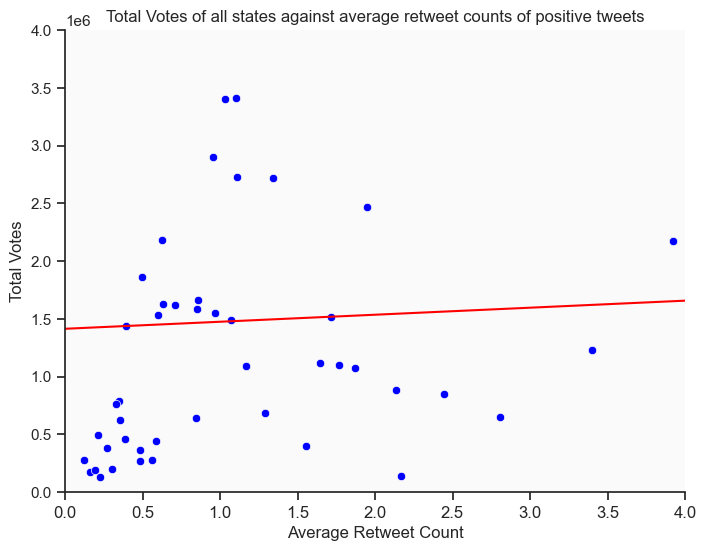

In [37]:
x = mean_pos_table['retweet_count'].values.reshape(-1,1)
y = mean_pos_table['total_votes'].values.reshape(-1,1)
plot_avg_retweet = sns.scatterplot(data = mean_pos_table,x = 'retweet_count', y = 'total_votes', legend = False, color = 'blue')
plot_avg_retweet.set(title = 'Total Votes of all states against average retweet counts of positive tweets', xlabel = 'Average Retweet Count', ylabel = 'Total Votes',xlim=(0, 4), ylim = (0, 4000000))
lr.fit(x,y)
x = np.linspace(0.0, 4.0).reshape(-1, 1)
y_pred = lr.predict(x)
plot_avg_retweet.plot(x, y_pred, color = 'red')
sns.despine()
plot_avg_retweet.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})

#### Total Votes vs Average User Follower
##### Through this plot, we can infer a direct corelation between average user follower count and total vote counts for most states(all dots represent a specific state). Moreover, there is a partially strong association between both the variables if we see the bottom half of the plot. However, some states do not follow the general trend and maybe considered outliers. The linear regression line clearly shows a positive relation between the average user follower count and total votes.

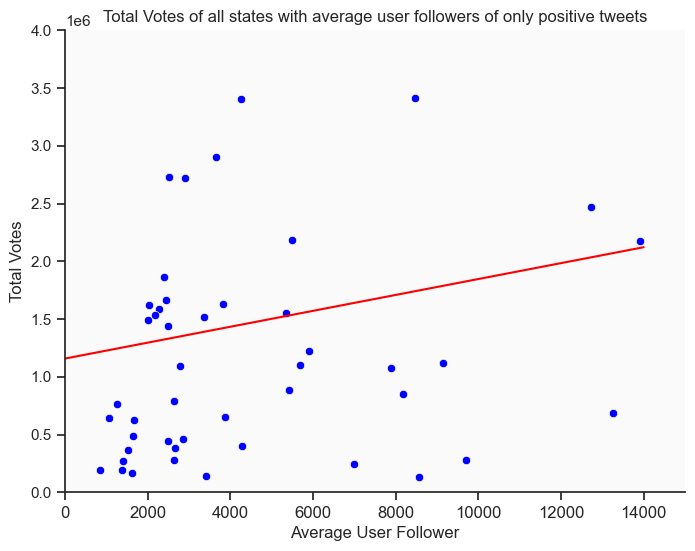

In [38]:
x = mean_pos_table['user_followers_count'].values.reshape(-1,1)
y = mean_pos_table['total_votes'].values.reshape(-1,1)
plot_avg_user = sns.scatterplot(data = mean_pos_table,x = 'user_followers_count', y = 'total_votes', legend = False, color = 'blue')
plot_avg_user.set(title = 'Total Votes of all states with average user followers of only positive tweets', xlabel = 'Average User Follower', ylabel = 'Total Votes', xlim=(0, 15000), ylim = (0,4000000))
lr.fit(x,y)
x = np.linspace(0.0, 14000.0).reshape(-1, 1)
y_pred = lr.predict(x)
plot_avg_user.plot(x, y_pred, color = 'red')
sns.despine()
plot_avg_user.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})

# Project 2

## The Message

##### The project is based upon the question over how the public engagement on Twitter is quantified towards political parties to predict election results through Sentiment Analysis of the tweets present in our data sets. Continuing my previously used independent variables (average number of likes, user follower count and retweet count of the tweets) from Project 1, I will move forward to demonstrate over how those variables have the relationship with the total number of votes recieved by each candidate. 

##### The second project aims to distinguish the relationship between the average retweet counts, likes and follower counts with the votes recieved by each candidate. Althought we did observed the positive relationships between the variables with only the positive tweets previously, we will now see the difference between how strong association and relationship between the variables are for each candidate for the tweets of a candidate regardless of the sentiment. In particular, the idea is if the relationship between variables are stronger for a specific candidate, it would reflect on the public engagement in a state and eventually the final results of the election. The concept is slightly counter-intuitive as we will see in the upcoming figures. Since, the data set we have has more significantly more tweets for Biden than Trump.

##### Moreover the maps aim to show how we can observe the distribution of the positive and negative emotions in each state for each candidate. The maps can become a good predictor over which candidate won in a state which depends on whether that state corresponds to stronger or weaker sentiment (positive or negative in our case). We observe in our study that not only a high positivity score but a low negativity score can also become a good predictor over who wins in some states specially if they are the battle ground states demonstrating high competition among the candidates. 

##### The following code creates a data frame that contains the average number of likes of the positive and negative sentiment tweets of Trump and Biden of each state. The data frame categorized the tweets with sentiment of each candidate and the calculated the average number of likes for each state. This data frame will then be used to create the individual scatter plots for Biden and Trump. 

In [39]:
only_negative = trump_biden_data.loc[trump_biden_data['Sentiment'] == 'Negative']
pos_neg_only = trump_biden_data.loc[trump_biden_data['Sentiment'] != 'Neutral']

all_state_likes = pos_neg_only.groupby(['state'])['likes'].mean().sort_values(ascending = False).index.tolist()
pos_neg_likes = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['likes'].mean().reset_index()
pos_neg_likes = pos_neg_likes[pos_neg_likes['state'].isin(all_state_likes)]

pos_neg_vote_likes = pd.merge(pos_neg_only, tvbs, on = ['state', 'Candidate Name'])
pos_neg_vote_likes = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['likes'].mean().reset_index()
pos_neg_vote_likes = pos_neg_vote_likes[pos_neg_vote_likes['state'].isin(all_state_likes)]

pos_neg_likes_sent = pd.merge(tvbs,pos_neg_vote_likes, on = ['state','Candidate Name'])

##### The following code removes the outlier states which were too high and made the relationship between the variables skewed. Moreover we made two separate data frames for our candidates Trumo and Biden which will be used to plot oour graphs. The plots shows the relationship between the average number of likes and vote count. Each dot in the scatter plots represent a state in the United States. 

##### Note here we observe that in the Trump graph, average likes and total votes has a stronger relationship which can be seen through the regression line when compared to the Biden graph which has a weaker association. The regression line explains a slighlty counter-intuitve idea. Since, Trump tweets in most states recieved average likes under 10, there is a cluster in the lower left corner for him. There are quite a few states that had a high average number of likes for Biden Tweets which made the regression line more flatter for him. This is clearly because Biden's tweets has more enagegement on his tweets. Thus in our model, the weaker the association the more the engagement!

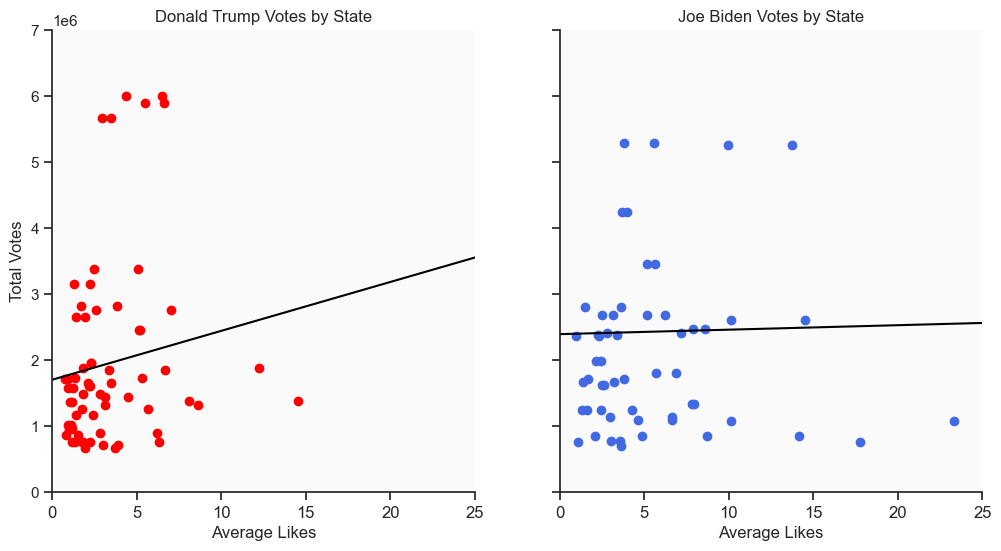

In [40]:
import numpy as np
from scipy.stats import linregress

trump_likes_only = pos_neg_likes_sent[pos_neg_likes_sent['Candidate Name'] == 'Donald Trump']
trump_likes_only = trump_likes_only.loc[trump_likes_only['likes'] < 40]
trump_likes_only = trump_likes_only.loc[trump_likes_only['total_votes'] > 650000]
biden_likes_only = pos_neg_likes_sent[pos_neg_likes_sent['Candidate Name'] == 'Joe Biden']
biden_likes_only = biden_likes_only.loc[biden_likes_only['likes'] < 40]
biden_likes_only = biden_likes_only.loc[biden_likes_only['total_votes'] > 650000]

# create two subplots side-by-side for Trump and Biden 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

# plot the positive sentiment scatter plot in the first subplot
axs[0].scatter(trump_likes_only['likes'], trump_likes_only['total_votes'], color='red')
axs[0].set(title = 'Donald Trump Votes by State', xlabel = 'Average Likes', ylabel = 'Total Votes')
axs[0].set(xlim = (0,25), ylim = (0,7000000))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# calculate and plot the regression line for positive sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(trump_likes_only['likes'], trump_likes_only['total_votes'])
x = np.array([0, 25])
y = intercept + slope * x
axs[0].plot(x, y, color='black')

# plot the negative sentiment scatter plot in the second subplot
axs[1].scatter(biden_likes_only['likes'], biden_likes_only['total_votes'], color='royalblue')
axs[1].set(title = 'Joe Biden Votes by State', xlabel = 'Average Likes')
axs[1].set(xlim = (0,25))
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# calculate and plot the regression line for negative sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(biden_likes_only['likes'], biden_likes_only['total_votes'])
x = np.array([0, 25])
y = intercept + slope * x
axs[1].plot(x, y, color='black')

plt.show()

##### The following code creates a data frame that contains the average number of retweets of the positive and negative sentiment tweets of Trump and Biden of each state. The data frame categorized the tweets with sentiment of each candidate and the calculated the average number of retweets for each state. This data frame will then be used to create the individual scatter plots for Biden and Trump. 

In [41]:
all_state_retweet = pos_neg_only.groupby(['state'])['retweet_count'].mean().sort_values(ascending = False).index.tolist()
pos_neg_retweet = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['retweet_count'].mean().reset_index()
pos_neg_retweet = pos_neg_retweet[pos_neg_retweet['state'].isin(all_state_retweet)]

In [42]:
pos_neg_vote_retweet = pd.merge(pos_neg_only, tvbs, on = ['state', 'Candidate Name'])
pos_neg_vote_retweet = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['retweet_count'].mean().reset_index()
pos_neg_vote_retweet = pos_neg_vote_retweet[pos_neg_vote_retweet['state'].isin(all_state_retweet)]

In [43]:
pos_neg_retweet_sent = pd.merge(tvbs,pos_neg_vote_retweet, on = ['state','Candidate Name'])

##### The following code removes the outlier states which contained high average retweet counts that made the relationship between the variables skewed. Moreover we made two separate data frames for our candidates Trumo and Biden which will be used to plot oour graphs. The plots shows the relationship between the average number of retweets and vote count in each state. Each dot in the scatter plots represent a state in the United States. 

##### Note here we observe that in the Trump graph, average retweet and total votes has a stronger association which can be observed by the regression line as compared to the Biden graph which has a weaker relationship. The regression line explains a slighlty counter-intuitve idea. Since, Trump tweets in most states recieved average retweets under 4, there is a cluster in the lower left corner for him. There are quite a few states that had a high average number of retweets of which many are much higher than 4 for Biden Tweets which made the regression line more flatter for him. This is clearly because Biden's tweets has more enagegement on his tweets through higher number of retweets per tweet. This is another example of how a weaker association corelates higher engagement. 

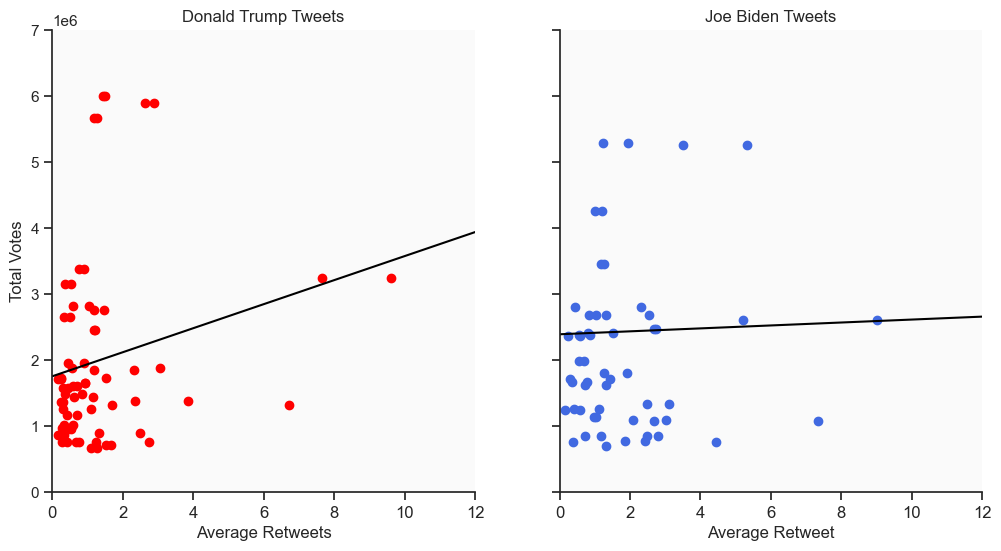

In [44]:
import numpy as np
from scipy.stats import linregress

trump_retweet_only = pos_neg_retweet_sent[pos_neg_retweet_sent['Candidate Name'] == 'Donald Trump']
trump_retweet_only = trump_retweet_only.loc[trump_retweet_only['retweet_count'] < 10]
trump_retweet_only = trump_retweet_only.loc[trump_retweet_only['total_votes'] > 650000]
biden_retweet_only = pos_neg_retweet_sent[pos_neg_retweet_sent['Candidate Name'] == 'Joe Biden']
biden_retweet_only = biden_retweet_only.loc[biden_retweet_only['retweet_count'] < 10]
biden_retweet_only = biden_retweet_only.loc[biden_retweet_only['total_votes'] > 650000]

# create two subplots side-by-side for Trump and Biden 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

# plot the positive sentiment scatter plot in the first subplot
axs[0].scatter(trump_retweet_only['retweet_count'], trump_retweet_only['total_votes'], color='red')
axs[0].set(title = 'Donald Trump Tweets', xlabel = 'Average Retweets', ylabel = 'Total Votes')
axs[0].set(xlim = (0,12), ylim = (0,7000000))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# calculate and plot the regression line for positive sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(trump_retweet_only['retweet_count'], trump_retweet_only['total_votes'])
x = np.array([0, 16])
y = intercept + slope * x
axs[0].plot(x, y, color='black')

# plot the negative sentiment scatter plot in the second subplot
axs[1].scatter(biden_retweet_only['retweet_count'], biden_retweet_only['total_votes'], color='royalblue')
axs[1].set(title = 'Joe Biden Tweets', xlabel = 'Average Retweet')
axs[1].set(xlim = (0,12))
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# calculate and plot the regression line for negative sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(biden_retweet_only['retweet_count'], biden_retweet_only['total_votes'])
x = np.array([0, 16])
y = intercept + slope * x
axs[1].plot(x, y, color='black')

plt.show()

##### The following code creates a data frame that contains the user followers that tweeted about Biden and Trump. The data frame is categorized with the sentiment by each state for each candidate. We then calculated the average number of user follower for each state. This data frame will then be used to create the individual scatter plots for Biden and Trump.

In [45]:
all_state_follower = pos_neg_only.groupby(['state'])['user_followers_count'].mean().sort_values(ascending = False).index.tolist()
pos_neg_follower = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['user_followers_count'].mean().reset_index()
pos_neg_follower = pos_neg_follower[pos_neg_follower['state'].isin(all_state_follower)]

In [46]:
pos_neg_vote_follower = pd.merge(pos_neg_only, tvbs, on = ['state', 'Candidate Name'])
pos_neg_vote_follower = pos_neg_only.groupby(['state', 'Candidate Name', 'Sentiment'])['user_followers_count'].mean().reset_index()
pos_neg_vote_follower = pos_neg_vote_follower[pos_neg_vote_follower['state'].isin(all_state_follower)]

In [47]:
pos_neg_follower_sent = pd.merge(tvbs,pos_neg_vote_follower, on = ['state','Candidate Name'])

##### The following code removes the outlier states which contained high average user follower counts that made the relationship between the variables skewed. Moreover we made two separate data frames for our candidates Trump and Biden which will be used to plot our graphs. The plots shows the relationship between the average number of user followers and vote count in each state. Each dot in the scatter plots represent a specific state in the United States. 

##### Just like in other graphs, we observe here too that in the Trump graph, average user followers and total votes has a stronger association which can be observed by the regression line as compared to the Biden graph which has a weaker relationship. This is another example of how the weaker association asserts more public engagement. Simiarly, Trump has a more dense cluster in the lower left corner of the first plot thna compared to Biden. This is because Biden has tweets that were tweeted by users with higher follower counts on average in more states than Trump. Thus, Biden's regression line also depicts weaker asscociation between the total votes and user follower count. This is another example of higher public engagement with weaker association. 

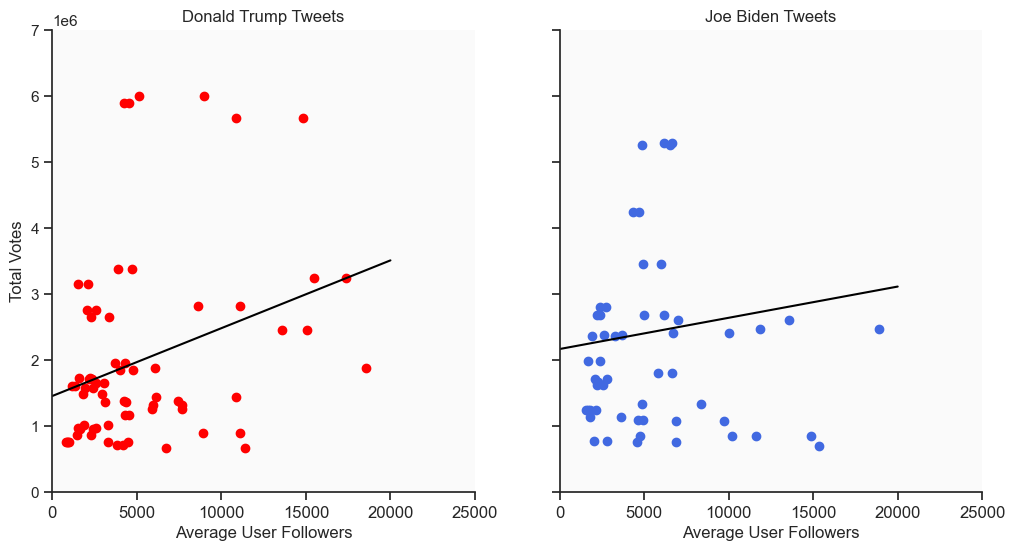

In [48]:
import numpy as np
from scipy.stats import linregress

trump_follower_only = pos_neg_follower_sent[pos_neg_follower_sent['Candidate Name'] == 'Donald Trump']
trump_follower_only = trump_follower_only.loc[trump_follower_only['user_followers_count'] < 20000]
trump_follower_only = trump_follower_only.loc[trump_follower_only['total_votes'] > 650000]
biden_follower_only = pos_neg_follower_sent[pos_neg_follower_sent['Candidate Name'] == 'Joe Biden']
biden_follower_only = biden_follower_only.loc[biden_follower_only['user_followers_count'] < 20000]
biden_follower_only = biden_follower_only.loc[biden_follower_only['total_votes'] > 650000]

# create two subplots side-by-side for Trump and Biden 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

# plot the positive sentiment scatter plot in the first subplot
axs[0].scatter(trump_follower_only['user_followers_count'], trump_follower_only['total_votes'], color='red')
axs[0].set(title = 'Donald Trump Tweets', xlabel = 'Average User Followers', ylabel = 'Total Votes')
axs[0].set(xlim = (0,25000), ylim = (0,7000000))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# calculate and plot the regression line for positive sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(trump_follower_only['user_followers_count'], trump_follower_only['total_votes'])
x = np.array([0, 20000])
y = intercept + slope * x
axs[0].plot(x, y, color='black')

# plot the negative sentiment scatter plot in the second subplot
axs[1].scatter(biden_follower_only['user_followers_count'], biden_follower_only['total_votes'], color='royalblue')
axs[1].set(title = 'Joe Biden Tweets', xlabel = 'Average User Followers')
axs[1].set(xlim = (0,25000))
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# calculate and plot the regression line for negative sentiment
slope, intercept, rvalue, pvalue, stderr = linregress(biden_follower_only['user_followers_count'], biden_follower_only['total_votes'])
x = np.array([0, 20000])
y = intercept + slope * x
axs[1].plot(x, y, color='black')

plt.show()

## Maps and Interpretations

##### The aim of the research is to quanitify public engagement on Twitter and predict election results. The maps essentially use the polarity scores as an independent variable and see how the mean positive and negative scores get distributed throughout all the states in the US. 

##### The maps in this research below aims to clearly indicate how a high positivity score for each candidate in a state can predict if they would win in the particular state or not. Moreover, we should not only restrict ourselves with the positive score for each candidate, we also account for the negative tweets and their negativity scores for each candidate. The negativity scores can also indicate where a candidate would win or lose depending on how strong the negative sentiment they recieved in a state on Twitter. For example, a strong negative sentiment would indicate that the candidate should have lost in the said state. Note that my independent variables in the maps are the positive and negative scores!

##### We convert the polarity score column into a dictionary so we can further separate the tweets between positive and negative tweets

In [49]:
only_positive['polarity_score'].convert_dtypes(dict)
only_negative['polarity_score'].convert_dtypes(dict)

5         {'neg': 0.14, 'neu': 0.86, 'pos': 0.0, 'compou...
19        {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'comp...
25        {'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...
29        {'neg': 0.206, 'neu': 0.712, 'pos': 0.082, 'co...
35        {'neg': 0.643, 'neu': 0.175, 'pos': 0.181, 'co...
                                ...                        
352502    {'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp...
352522    {'neg': 0.385, 'neu': 0.33, 'pos': 0.286, 'com...
352541    {'neg': 0.102, 'neu': 0.844, 'pos': 0.054, 'co...
352568    {'neg': 0.173, 'neu': 0.737, 'pos': 0.09, 'com...
352581    {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...
Name: polarity_score, Length: 59674, dtype: object

##### The following code creates a data frame that contains the only positive tweets that was created in Project 1. We now add another column in this new data frame which contains the positivity score (referred to as polarity score before) for each tweet. Note that we already calculated these scores from our Sentiment Analyzer previously and we are no extracting them out for mapping. Moreover, we keep all the observations from the United States only. Remember that this data set still contains both the Candidate positive tweets which will soon categorize.

In [50]:
state_op = only_positive[only_positive['country'] == 'United States of America'].dropna(subset=['state_code'])
state_op['positive'] = state_op.polarity_score.apply(lambda x: x.get('compound'))

##### We do a similar procedure for the negativity scores. We use the data frame that contains only the negative tweets of both the candidates and extract out the negative score for each tweet. We make a new column and assign the negativity score to each tweet which was calculated by our sentiment analyzer.

In [51]:
state_on = only_negative[only_negative['country'] == 'United States of America'].dropna(subset = ['state_code'])
state_on['negative'] = state_on.polarity_score.apply(lambda x: x.get('compound'))

##### This is the most important part of the project. We now separate our negative and positive tweets by each candidate. We want to observe the mean distribution scores for the positive and negative sentiments separately for Biden and Trump throughout all the states.  

In [52]:
state_opt = state_op.loc[state_op['Candidate Name'] == 'Donald Trump']
state_opt_1 = state_opt.groupby(['state', 'state_code'])['positive'].mean().reset_index()

state_opb = state_op.loc[state_op['Candidate Name'] == 'Joe Biden']
state_opb_1 = state_opb.groupby(['state', 'state_code'])['positive'].mean().reset_index()

In [53]:
state_ont = state_on.loc[state_on['Candidate Name'] == 'Donald Trump']
state_ont_1 = state_ont.groupby(['state', 'state_code'])['negative'].mean().reset_index()

state_onb = state_on.loc[state_on['Candidate Name'] == 'Joe Biden']
state_onb_1 = state_onb.groupby(['state', 'state_code'])['negative'].mean().reset_index()

##### The following code outputs the mean positivity score distribution for all the positive tweets of Donald Trump in the states. We observe that the higher the positivity score, the darker the region is (dark red). In Trump’s case, we see Texas, Oklahoma, Kansas, North Dakota and Alaska has a high positivity score for Donald Trump (positivity score ranging between 0.6 and 0.7). This should clearly indicate that he should win in those states. In fact, he did win all the aforementioned states! There are a few outlier states which are contradictory to our results for example the state of Nevada, Wisconsin, Michigan and Virginia where Biden won, but Trump did receive positive sentiment tweets from these states. Note that the outlier states were battle ground states meaning both the candidates had an equal chance of winning in that state and the competition was not one-sided. Similarly, as we would expect a low positivity score for Trump would essentially indicate that he should lose in those states for example we see Georgia, Washington and New York with low positive scores where he indeed lost. (Use the interactive feature to look for states!)

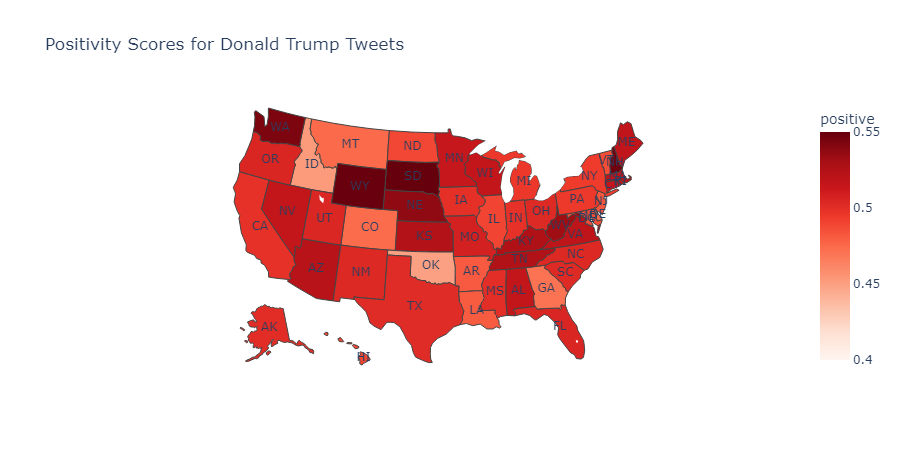

In [54]:
fig = px.choropleth(state_opt_1,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='positive',
                    color_continuous_scale=('Reds'),
                    range_color=(0.4,0.55),
                    color_continuous_midpoint=0,
                    title = 'Positivity Scores for Donald Trump Tweets'
                    )

fig.add_scattergeo(
    locations=state_opt_1['state_code'],
    locationmode="USA-states", 
    text=state_opt_1['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map1.png")

##### The following code outputs the mean positivity score distribution for all the positive tweets of Joe Biden in the states. We observe that the higher the positivity score, the darker the region is (dark blue). In Biden’s case, we see Washington, Colorado, Wisconsin and New Jersey has a high positivity score for Joe Biden  (positivity score ranging between 0.6 and 0.7). Biden indeed win in all the aforementioned states. There are a few outlier states that are contradictory to the actual outcomes for example the state of Iowa and Wyoming where Trump won, Biden received high positive sentiment tweets in these states. Similarly, as we would expect a low positivity score for Biden would essentially indicate that he should lose in those states for example we see Florida, Utah and Ohio with low positive scores where he indeed lost. There are a few contradictions as well like in Nevada and Virginia where Biden received very few positive sentiments, yet he won there. This is consistent with our contradiction from the previous map too! (Use the interactive feature to look for states!)

In [55]:
state_opb_1['state_code'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

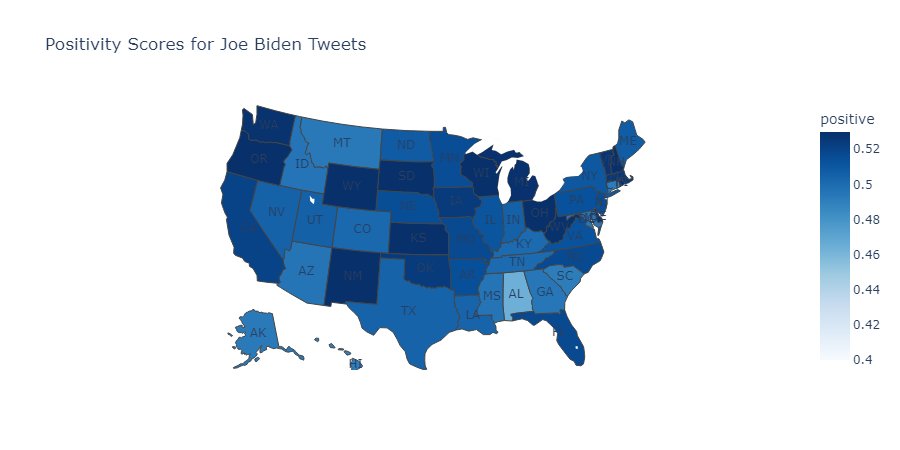

In [56]:
fig = px.choropleth(state_opb_1,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='positive',
                    color_continuous_scale=('blues'),
                    range_color=(0.4,0.53),
                    color_continuous_midpoint=0,
                    title = 'Positivity Scores for Joe Biden Tweets'
                    )
fig.add_scattergeo(
    locations=state_opb_1['state_code'],
    locationmode="USA-states", 
    text=state_opb_1['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map2.png")

##### We mentioned that the negative sentiment is also a good indicator for prediction. A state where a candidate would receive high negative sentiment scores, we would expect them to lose there and vice versa. 

##### The map below shows the distribution of the mean negative score for all negative tweets of Donald Trump by state. The negativity scale can be interpreted as the more the negative the lighter the region would be, light red in this case (i.e. a score of -0.7 would be considered strong negative sentiment). The states which received low negative sentiment by Trump were Kansas, Kentucky and West Virginia which is consistent with the election results since Trump won in all the aforementioned states. There are a few contradictions like Texas and Mississippi where Trump received strong negative sentiment tweets yet he won in the said states. Nevertheless, a low negative score can indicate whether people disliked that candidate and so if they could win there or not in the respective states.

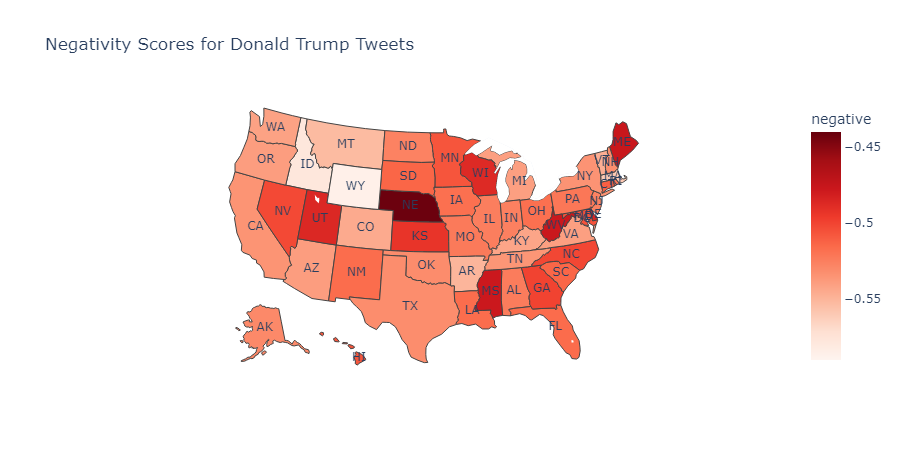

In [57]:
fig = px.choropleth(state_ont_1,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='negative',
                    color_continuous_scale=('Reds'),
                    range_color=(-0.59,-0.44),
                    color_continuous_midpoint=0,
                    title = 'Negativity Scores for Donald Trump Tweets'
                    )

fig.add_scattergeo(
    locations=state_ont_1['state_code'],
    locationmode="USA-states", 
    text=state_ont_1['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map3.png")

##### The following code outputs the map of the mean distribution of the negativity scores for all the negative tweets received by Biden by state. Biden received strong negative sentiment tweets in Texas, Idaho, Nebraska and Wyoming where we would expect him to lose and he did lose indeed in the said states. Similarly, he received very low negative sentiment scores in Washington and Oregon which explains why he won there. There are a few contradictions like Kansas where Biden received low negative sentiments yet, he lost. This is consistent with our previous map where Trump received high positivity scores in Kansas in particular. Thus, once we compare the graphs accordingly, we can see the relative scores between each candidate has a major impact on who would win in that state. 

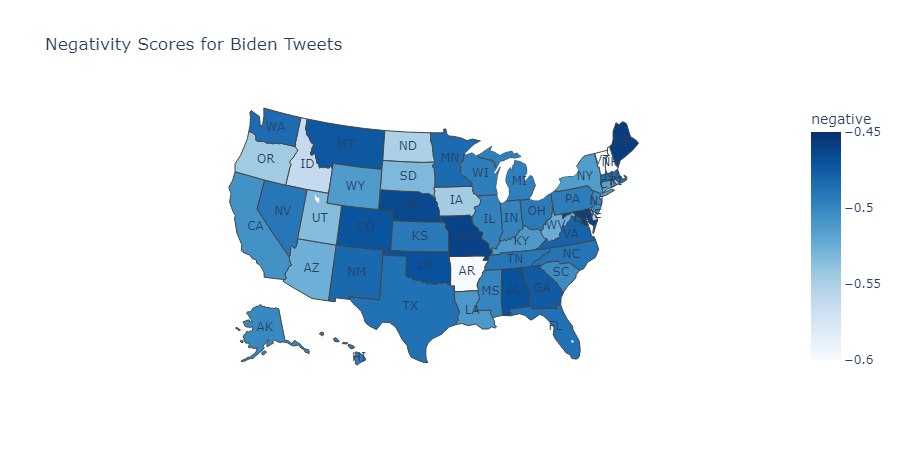

In [58]:
fig = px.choropleth(state_onb_1,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='negative',
                    color_continuous_scale=('blues'),
                    range_color=(-0.60,-0.45),
                    color_continuous_midpoint=0,
                    title = 'Negativity Scores for Joe Biden Tweets'
                    )

fig.add_scattergeo(
    locations=state_onb_1['state_code'],
    locationmode="USA-states", 
    text=state_onb_1['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map4.png")

##### Nevertheless, if a candidate which has strong negative sentiment and weak positive sentiment in a state, we would expect them to eventually lose. Similarly, if someone has weak negative and strong positive sentiment in a state, we would expect them to win. In the future relative scores between positive and negative scores for a candidate can play an intriguing role in calculating and predicting how each candidate did there. 

## Merging with the 2020 Election Results Data Set

##### The data set used in this part of the project is about the election results and has been used previously. We visualize the states where each candidate won by defining the victory function. The data set was accessed from Kaggle (https://www.kaggle.com/datasets/unanimad/us-election-2020) that contains detailed information of all the candidates who ran for the elctions. The data set contains a number of files on different levels of the politial and judiciary system of USA from governors and counties to state and district levels. We only used the president state file since our analysis is based on state level and and our main candidates are Trump and Biden. 
##### The following code creates a new data frame with the state name and the candidate who won in that particular state. The data frame was created by using the president county data from the election results data set. An interactive map will show which candidate won in which states!

In [59]:
first_two_rows_by_state = tvbs.groupby('state').head()

# Loop over the unique states in the first two rows and create a new data frame for each state
def vic(df):
    state_dfs = []
    for state in first_two_rows_by_state['state'].unique():
        # Get the vote counts for the two candidates in the current state
        state_rows = first_two_rows_by_state[first_two_rows_by_state['state'] == state]
        candidate_1_votes = state_rows.iloc[0,2]
        candidate_2_votes = state_rows.iloc[1,2]
        
        # Determine which candidate won the state
        if (candidate_1_votes > candidate_2_votes).all():
            winner = 'Donald Trump'
        else:
            winner = 'Joe Biden'
        
        # Create a new data frame for the current state with a single row containing the winner's name
        state_df = pd.DataFrame({'State': [state], 'Winner': [winner]})
        state_dfs.append(state_df)
        
    # Concatenate the state data frames into a single data frame
    result_df = pd.concat(state_dfs, ignore_index=True)
    return result_df
winner = vic(tvbs)

In [60]:
# renaming columns for data merging
winner.rename(columns = {'State' : 'state'}, inplace = True)

In [61]:
# Merging the winner data set with a data set that contains the state names
winner = pd.merge(winner, only_positive, on = ['state'])
winner_1 = winner.groupby(['state', 'state_code', 'Winner'])['retweet_count'].count().reset_index()

##### The following code makes a map showing which candidate won in each state in the United States. This gives us a way to compare our results from our previous map's interpretations and results and make sure that our conclusions are correct are not. 

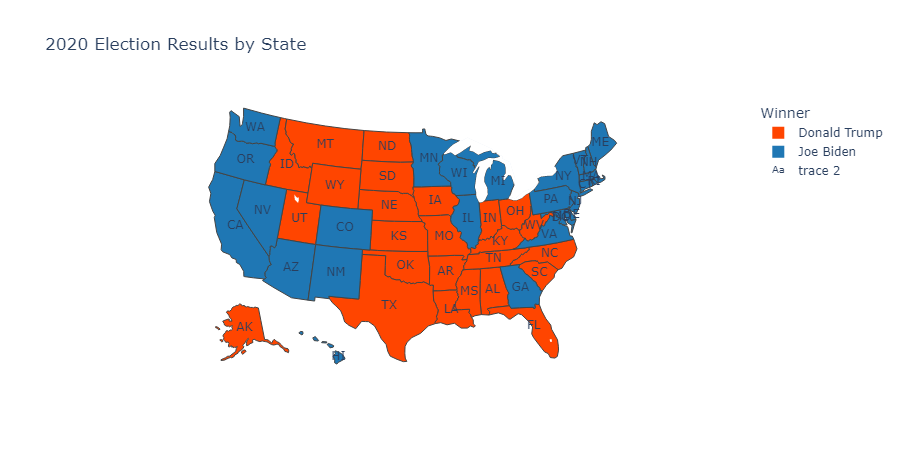

In [62]:
import plotly.express as px
color_map = {'Donald Trump': 'orangered', 'Joe Biden': '#1f77b4'}
fig = px.choropleth(winner_1, 
                    locationmode='USA-states',
                    locations='state_code',
                    color='Winner',
                    scope='usa',
                    color_discrete_map=color_map, 
                    title = '2020 Election Results by State')

fig.add_scattergeo(
    locations=winner_1['state_code'],
    locationmode="USA-states", 
    text=winner_1['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map5.png")

# Project 3

## Potential Data to Scrape
##### Alongside the twitter data set that reflects the tweets of the two primary candidates, Donald Trump and Joe Biden, there is a possibility to explore a new relation between the proportion of people who tweeted about the candidate on Twitter and what was the proportion who actually voted on the election day. To analyze this relationship we would require the population data of each state. For that purpose, we need a data set that contains the population size of each state. Although we had millions of tweets in our datasets, there was a void and a question of how much those tweets was representative of votes received by each candidate by the people. 
##### An analysis with the population parameter would put further emphasis on how data from Twitter could be impactful and act as a reliable source to predict the presidential election outcomes. If only, we could observe a similar ratio of the people who tweeted in a state for a candidate also voted for their favored candidate, we could conclude with concrete evidence that the twitter data indeed is reliable for predicting election results. The main idea of these calculations would be to demonstrate the public engagement on twitter and compare it to the engagement people show by moving forward in their ideas by voting their preferred candidate on the election day.
##### Thus, scraping of the population of each state was required. Luckily, we had the 2020 population census available on Wikipedia and a nice table was available for each state. The table was the Population and population change in the United States by state of the year 2020. The table can be viewed on the following website; https://en.wikipedia.org/wiki/2020_United_States_census#State_rankings. We merge the population data set with the total votes data set and calculate the proportion of total votes received by each candidate compared to the population size of that state. Furthermore, this would also help us visualize which candidate had a higher ratio of support in each state. 


## Potential Challenges 
##### The population census is a very complex process for which the data takes months to gather until the final numbers are published by the United States Census Bureau. Moreover, population census is very costly and there are numerous external factors including corruption and political agendas that affect the population census numbers drastically. After some further research, I learned about the limitations of the 2020 Population census, which showed that it undercounted many of the same population groups that were historically undercounted and overcounted some other groups. It was revealed that the 2020 census undercounted the African American Population, the Alaska Native population and the Latino population. Similarly, the census also overcounted the White and Asian population. 
##### Moreover, it is vital to note that there is a gap between the population data I have and the data I would need. The minimum age to vote in the United States is 18 or above and so, I would essentially need the population data of the people ages over 18. Unfortunately, the data we have from Wikipedia that could be retrieved through scraping contains the total population regardless of the age. This will eventually affect our results statistically and can potentially hinder to answer our research question with solid evidence. Moreover, the minimum age to make a twitter account is 13 which also makes it more challenging to compare the two proportions. Similarly, the census was released in April of 2020 while the election took place in November of 2020 which widened the gap due to time. These challenges are majorly faced due to the nature of the data and its collection in itself.
##### The Wikipedia table was scraped through the HTML based web scraping method. Just to make sure that the table contained the correct values, I compared the population values of each state by another website that was the US Department of Agriculture of Economic Research for accurate numbers. To be more precise in the research, we would need to scrape the data of population of different ages throughout each state ourselves for the future. This would give us detailed numbers and the timeframe in which they changed. 


## Scraping Data from a Website
##### The website data provided in the course for the Election 2020 results was the population data of New York for each zip code but I used the data which I scraped from Wikipedia as mentioned before.

##### We first import the neccessary python libraries like BeautifulSoap and Requests. BeautofulSoup is a widely used framework that uses scraping using python. Similarly, Requests, is a python module to send requests like HTTP. It is an easy library to use and we can pass parameters including URL's etc. Moreover, basic knowledge of HTML is also required to understand web scraping done below

In [63]:
import requests
from bs4 import BeautifulSoup

##### We first assign the link or the URL of the website from which the data has to be scraped from. After inspecting the element of the Wikipedia page, I saw that my table was stored in the <table> tag in HTML. I assigned my table class from the inspect element page to a new variable as well. We finally send a GET request to the Wikipedia URL. Note that we need to check the status code since, to ensure that we are scraping the data legally. The reponse 200 means that it was a successful response and so, it is safe to move ahead with the scraping process!

In [64]:
wikiurl = 'https://en.wikipedia.org/wiki/2020_United_States_census#State_rankings'
table_class = "wikitable sortable jquery-tablesorter"
response = requests.get(wikiurl)
response.status_code

200

##### We now create a BeautifulSoup object and using find() method extract the relevant information, which in our case is the <table> tag. Since there can be many tables in a Wikipedia page, we also specify the class and the id attribute of the <table> tag.

In [65]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
population_table = soup.find('table', {'class' : "wikitable"})

##### We now read the HTML table into a list of dataframe object using read_html() which returns a list. We then convert the list into a DataFrame. 

In [66]:
population_2020 = pd.read_html(str(population_table))
population_2020 = pd.DataFrame(population_2020[0])

##### After viewing the table, we clean the table and keep all the information which we need. We first sorted the states of the table in ascending alphabetical order. Then we drop the columns which are not needed for our analysis. Moreover, we rename the columns with meaningful names. We also removed the observation of USA which had the total population

In [67]:
population_2020 = population_2020.sort_values('State', ascending = True)
population_2020 = population_2020.reset_index(drop = True)
population_2020 = population_2020.drop(columns = ['Rank', 'Population as of2010 census[80]', 'Change', 'Percentchange'])
population_2020 = population_2020.rename(columns = {'Population as of2020 census[79]': 'Population 2020 census'})
population_2020_noUS = population_2020[population_2020['State'] != 'United States']
population_2020_noUS = population_2020_noUS.rename(columns = {'State' : 'state'})

##### We can see by the barplot below that the state with the highest population is California followed by Texas, Florida and New York.  

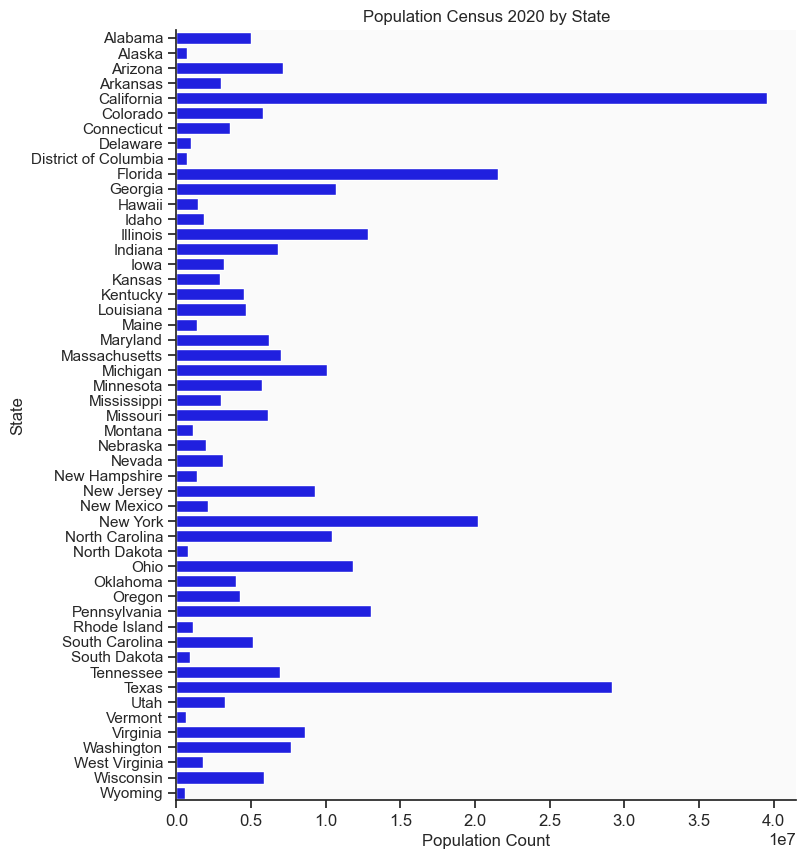

In [68]:
population_plot = sns.barplot(data = population_2020_noUS, x = 'Population 2020 census', y = 'state', color = 'blue')
sns.despine()
population_plot.figure.set_size_inches(8, 10)
population_plot.set(title = 'Population Census 2020 by State', xlabel = 'Population Count', ylabel = 'State')
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False})


##### The following code now merge the population data set and the previous data set of total votes by state data frame from the previous projects. We merge the data set by state name to compare the votes/population proportion. The data frame contains 102 entries for 51 states. Since the merging was done based on state, we have each vote counts for Trump and Biden separately for each state. 

In [69]:
votes_pop = pd.merge(tvbs, population_2020_noUS, on = 'state')

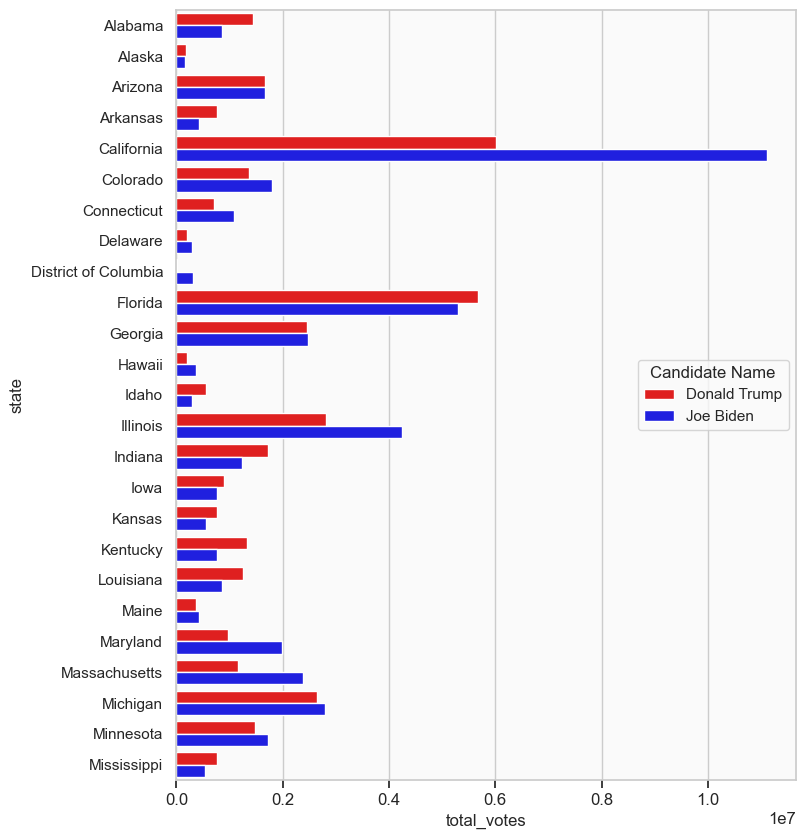

In [70]:
vote_count_plot = sns.barplot(data = votes_pop.head(50), x = 'total_votes', y = 'state', hue = 'Candidate Name', palette = my_palette)
vote_count_plot.figure.set_size_inches(8, 10)
sns.move_legend(vote_count_plot, 'center right')

##### The following code makes a data frame that only contains the state name na dit's code. I made this data frame for convenience to merge it with the data frames made later for mapping purposes. 

In [71]:
state_code = trump_biden_data.drop(columns = ['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent',
       'collected_at', 'Candidate Name', 'clean', 'clean', 'polarity_score', 'Sentiment'])
state_code = state_code.drop_duplicates()

##### The following code is the most important step of our project since it calculates the proportion of votes/population by state for each candidate and puts those value sinto a new column. We then create two separate datframes for each candidate for further visualizations and analysis!

In [72]:
votes_pop = pd.merge(state_code, votes_pop, on = 'state')
votes_pop['Votes_Population_Proportion'] = votes_pop['total_votes'] / votes_pop['Population 2020 census']
votes_pop = votes_pop.sort_values('state')
# this data set contains the proportion of total votes/population of each state
votes_pop_trump = votes_pop[votes_pop['Candidate Name'] == 'Donald Trump'] # only trump proportions
votes_pop_biden = votes_pop[votes_pop['Candidate Name'] == 'Joe Biden'] # only biden proportions 

##### The table below gives us a lot of the reasons why Biden won in the 2020 election. The mean proportion of Biden is greater tha Trump which indicates that Biden recieved more votes for each person in a state. Simialrly, The standard deviation of Trump is much higher compared to Biden's which means that Trump only got high number of votes in a few states while Biden had a higher proprotion of votes with respect to population in a lot of states. The maximum proportion of Biden is also higher than Trump and the minimum proportion of Trum is significantly lower for Trump too.

In [73]:
votes_pop.groupby('Candidate Name')['Votes_Population_Proportion'].describe()

,count,mean,std,min,25%,50%,75%,max
Candidate Name,,,,,,,,
Donald Trump,51.0,0.239557,0.055079,0.026954,0.20420,0.258043,0.270110,0.335544
Joe Biden,51.0,0.240775,0.070610,0.127266,0.18263,0.236887,0.290132,0.460192


##### The following histograms visualizes the proportions of each Candidate side-by-side. The histogram reaffirms the idea that Trump recieved a similar proportion in a lot of states while Biden received a varied proportion in the states. Since, Biden recieved a higher proportion (more than 0.3) in a lot of states, he therefore had an advantage of higher number of votes ending up winning the elections. It is important to realize through these graphs that more than half of the population of the USA do not vote in the elections. Ofcourse the population contains the people below 18 years of age, it still is a very low proportion of people who voted in general in the states. 

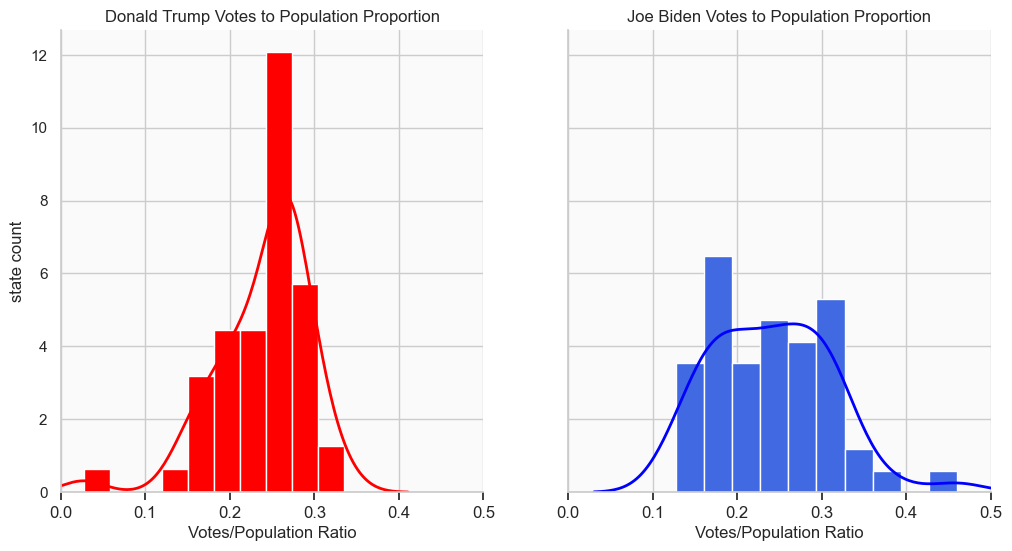

In [74]:
import scipy.stats as stats

# create two subplots side-by-side for Trump and Biden 
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# plot the Trump's vote to population ratio histogram with a curved line in the first subplot
axs[0].hist(votes_pop_trump['Votes_Population_Proportion'], color='red', density=True)
sns.kdeplot(votes_pop_trump['Votes_Population_Proportion'], ax=axs[0], color='red', linewidth=2)
axs[0].set(xlim=(0, 0.5))
axs[0].set(title = 'Donald Trump Votes to Population Proportion', xlabel = 'Votes/Population Ratio', ylabel = 'state count')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# plot the Biden's vote to population ratio histogram with a curved line in the second subplot
axs[1].hist(votes_pop_biden['Votes_Population_Proportion'], color='royalblue', density=True)
sns.kdeplot(votes_pop_biden['Votes_Population_Proportion'], ax=axs[1], color='blue', linewidth=2)
axs[1].set(xlim=(0, 0.5))
axs[1].set(title = 'Joe Biden Votes to Population Proportion', xlabel = 'Votes/Population Ratio')
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

plt.show()

##### The following barplot also shows the difference in the proportion between Trump and Biden in a lot of states. Just by a quick glance, Biden is dominating in the 20 states visualized below. States like ALabama, Alaska, Arkansas and Kansas where Trump recieved a greater proportion of votes when compared to the population, he indeed won in the said states. Similarly, Biden also won in the states where he receieved a higher proportion of votes including Columbia, Colorado, California and Illinois which is intuitive in itself. 

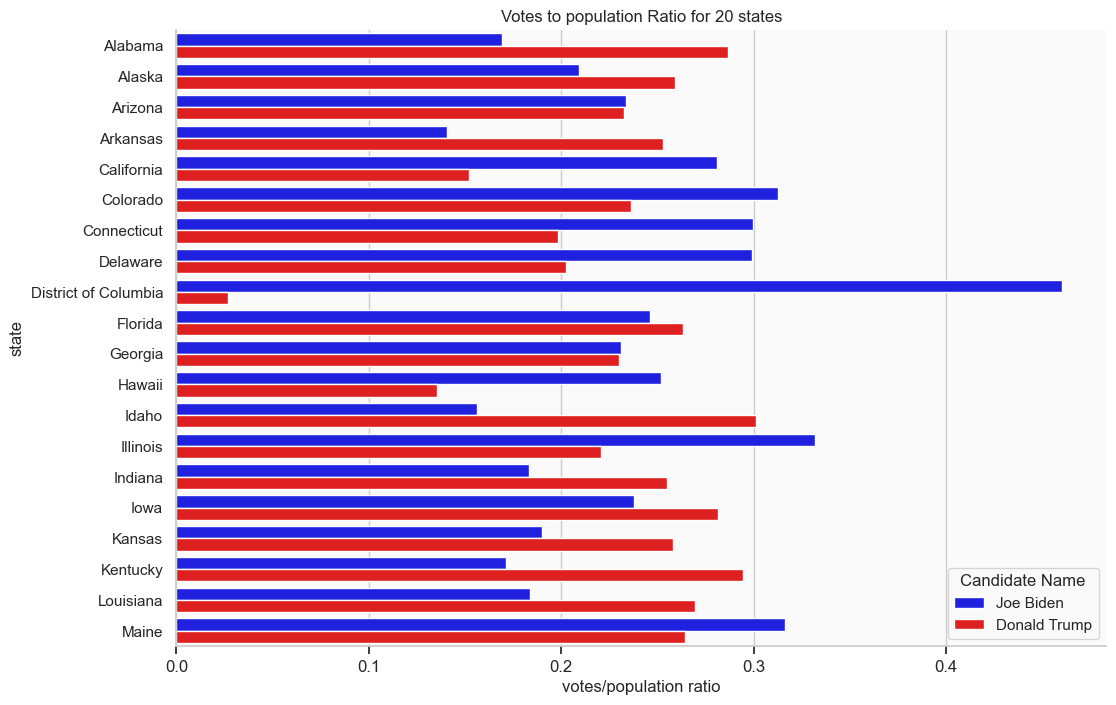

In [75]:
ax = sns.barplot(data = votes_pop.head(40), x = 'Votes_Population_Proportion', y = 'state', hue = 'Candidate Name', palette = my_palette)
ax.figure.set_size_inches(12, 8)
sns.despine()
sns.move_legend(vote_count_plot, 'lower right')
ax.set(title = 'Votes to population Ratio for 20 states', xlabel = 'votes/population ratio')
sns.move_legend(ax, 'lower right')

##### The two maps below shows the votes to population proportion of Trump and Biden for each state respectively. The whole idea of the comparison of the maps is to see the intensity of the colors. For example for any state, if Biden has a darker color comapred to the Trump, it would mean that Biden recieved a higher proportion and thus won in that state. Suppose, California (CA) has a very light red color in the Trump map while Biden has a higher intense blue color in California which would mean that Biden won in California. Simialrly, Trump recieved a higher proportion of votes in Wyoming (WY) that has a very intense red color while Biden has a very light blue color in that state which indicates that Trump must have won in Wyoming which he did!

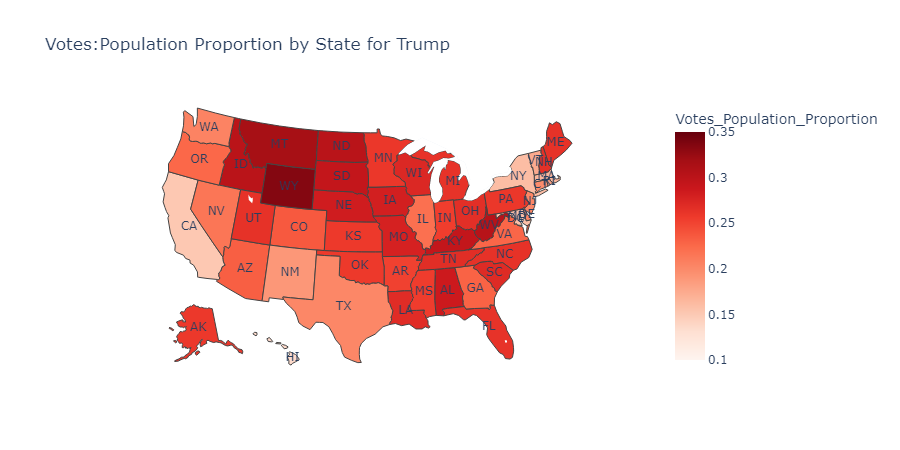

In [76]:
fig = px.choropleth(votes_pop_trump,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='Votes_Population_Proportion',
                    color_continuous_scale=('Reds'),
                    range_color=(0.1, 0.35),
                    color_continuous_midpoint=0,
                    title = 'Votes:Population Proportion by State for Trump'
                    )

fig.add_scattergeo(
    locations=votes_pop_trump['state_code'],
    locationmode="USA-states", 
    text=votes_pop_biden['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map6.png")

##### The heat map below is of Biden's votes to population ratio in each state. Note that Biden has a very high ratio in Oregon (OR) as compared to Trump when the color intensity is comapred for the states. Another successful examples is Kentucky where Trump won!

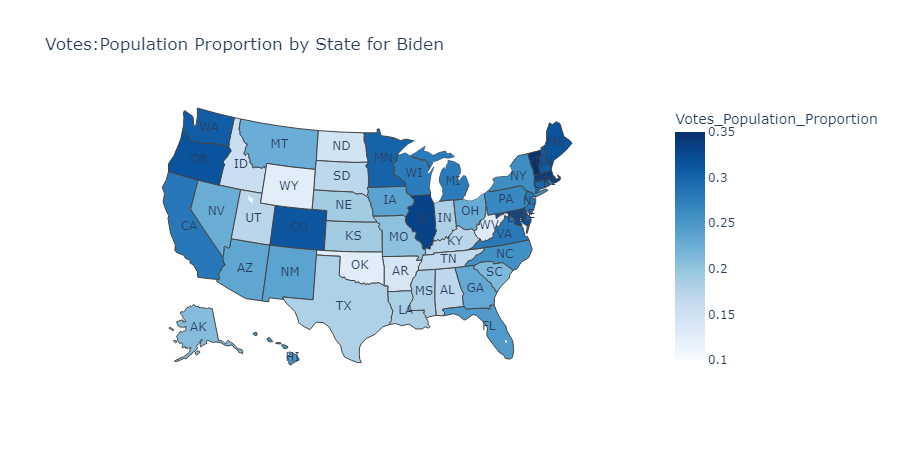

In [77]:
fig = px.choropleth(votes_pop_biden,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='Votes_Population_Proportion',
                    color_continuous_scale=('blues'),
                    range_color=(0.1, 0.35),
                    color_continuous_midpoint=0,
                    title = 'Votes:Population Proportion by State for Biden'
                    )


fig.add_scattergeo(
    locations=votes_pop_biden['state_code'],
    locationmode="USA-states", 
    text=votes_pop_biden['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map7.png")

##### We now move to the most important task of the project. Comparing the heatmaps of the tweet count ratio with the votes-population ratio for each state by Candidate. 


##### The following code below creates a data frame by using our data frame that contains the only positive tweets of each candidate in the states. This data frame contains the number of positive tweets each candidate received in each state. The state of Northern Mariana Islands was also removed. We had to add the state_code column for convenience in mapping. Similarly, we removed the columns which were not needed for the analysis. By removing unneccessary columns, the processing time became much faster further on!  

In [78]:
tweet_count = only_positive.groupby(['state', 'Candidate Name', 'state_code']).count()
tweet_count = tweet_count.drop(columns = ['created_at', 'tweet_id', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'collected_at'])
tweet_count = tweet_count.reset_index(drop=False)
tweet_count = tweet_count.rename(columns={'tweet': 'Tweet Count'}, inplace=False)
tweet_count = tweet_count[tweet_count['state'] != 'Northern Mariana Islands']
tweet_count_1 = tweet_count.groupby('state').apply(lambda x: x['Tweet Count'].head(2).sum())
tweet_count_1 = pd.DataFrame(tweet_count_1).reset_index()
tweet_count = pd.merge(tweet_count_1, tweet_count, on ='state')
tweet_count = tweet_count.rename(columns = { 0 : 'Total Tweet Count'})
tweet_count = tweet_count.drop(columns = ['clean', 'polarity_score', 'Sentiment'])
# This data set contains the number of tweets by state for each candidate respectively

##### We now calculate and add the proportion of the tweet count of each candidate for each state. The data frame was created to show whether the tweet count proportion is a good representative of the people who actually voted. We then separated the observations and made two data frames for each candidate! 

In [79]:
tweet_count['tweet proportion'] = tweet_count['Tweet Count'] / tweet_count['Total Tweet Count']


##### We now create two separate data frames for each candidate for all the positive tweets and visualize their proportions

In [80]:
tweet_count_trump = tweet_count.loc[tweet_count['Candidate Name'] == 'Donald Trump']
tweet_count_biden = tweet_count.loc[tweet_count['Candidate Name'] == 'Joe Biden']

##### The following code creates a heat map that shows the distribution of the proportion of the positive tweets recieved by Doanld Trump in each state. When we compare this to the map of the votes population proportion map of Trump made previously, we see a similar trend in the intensity of the colors. Although there are some exceptions in a few states like Wyoming (WY), the distribution of the colors follows a specific trend in general. The proportions are difficult to judge between the two parameters due to the limitations of the data and strong assumptions. Moreover, as mentioned before the  number of tweets for Joe Biden in our data set is much larger and so, this brings in quite a big gap in the analysis!

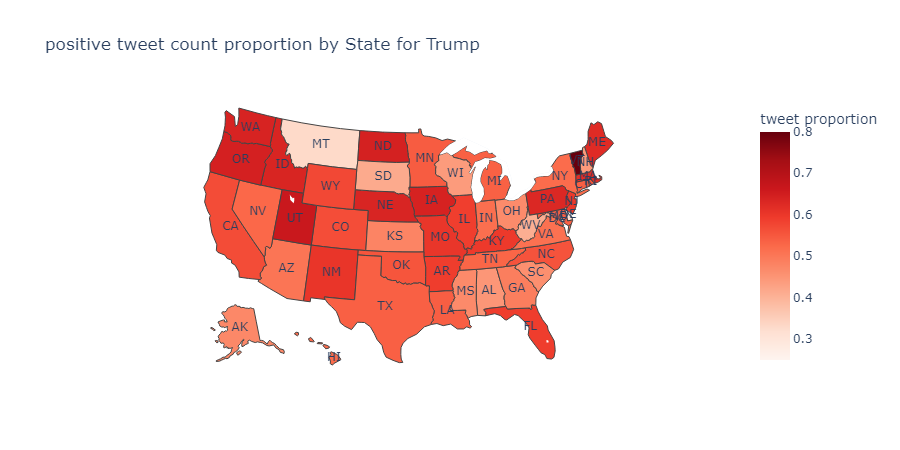

In [81]:
fig = px.choropleth(tweet_count_trump,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='tweet proportion',
                    color_continuous_scale=('Reds'),
                    range_color=(0.25, 0.8),
                    color_continuous_midpoint=0,
                    title = 'positive tweet count proportion by State for Trump'
                    )


fig.add_scattergeo(
    locations=tweet_count_trump['state_code'],
    locationmode="USA-states", 
    text=votes_pop_biden['state_code'],
    mode='text'
)
# fig.show() 
display.Image(r"C:\Users\danis\Downloads\map8.png")

##### The following code creates a heat map that shows the distribution of the proportion of the positive tweets recieved by Joe Biden in each state. When we compare this to the map of the votes population proportion map of Biden made previously there is a pattern in the intensity of the blue colors. Nevertheless, there are some anomalies in a few states like Mississipi (MS), the distribution of the colors follows a general trend in general. 

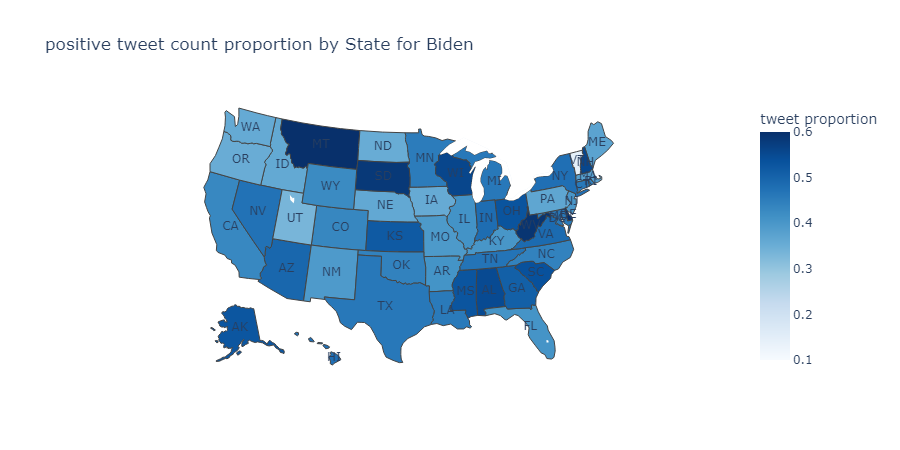

In [82]:
fig = px.choropleth(tweet_count_biden,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='tweet proportion',
                    color_continuous_scale=('blues'),
                    range_color=(0.1, 0.6),
                    color_continuous_midpoint=0,
                    title = 'positive tweet count proportion by State for Biden'
                    )


fig.add_scattergeo(
    locations=tweet_count_biden['state_code'],
    locationmode="USA-states", 
    text=votes_pop_biden['state_code'],
    mode='text'
)
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map9.png")

## Merging Covid-19 Dataset

##### In this part of the project, I decided to view the 2020 elections from a different lens. We know that the elections were held during the COVID-19 pandemic. I inferred that the pandemic must have affected the eletion in some way, either in support of Biden or against Trump which resulted in Biden to win the elections. After some external research regarding COVID-19 in the United States I saw that Biden had much favorable policies related to health. Biden promised better healthcare reforms comapred to Trump so I hypothesized that the states that had a higher number of covid cases ended up supporting Biden. We already had the map for positive sentiment for Biden and Trump respectively from our previous projects and a comparison of the maps would certainly be helpful to prove my hypothesis. For this purpose I looked up and found out the data set that contains the the covid-19 statistics of USA. I finally got access to a detailed data set that contained about all the information about covid related parameters including total number of cases and deaths etc on state level which was updated every day (https://www.worldometers.info/coronavirus/country/us/).

##### The following code reads the dataset that originally contained the US COVID-19 cases and deaths by state over time. The data contained over 60000 observations and data cleaning was neccessary. Note that We needed the data of the statistics of covid-19 which occured before the election date, November 3rd 2020. So, we first removed all the observations that had na values for the submission date. We then change the date time in the data frame to the correct python format. We then filtered all the observations with the dates that were pre-election. After removing the na values for total cases column, we sorted values for state and submission date. We then used the first() method to collect the first 50 rows of each state for thet election date. Note that these observations would have the total number of cases (cumulative since the first case observed) for each state by the election date. We finally removed all the unnecessary columns from the data frame. 

In [83]:
covid_cases = pd.read_csv(r"C:\Users\danis\Desktop\University of Toronto\Winter 2023\ECO225H1\ECO225Project\data\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv")
covid_cases = covid_cases.dropna(subset = ['submission_date'])
covid_cases['submission_date'] = pd.to_datetime(covid_cases['submission_date'])
covid_cases = covid_cases.query('submission_date <= "11/3/2020"')
covid_cases = covid_cases.query('submission_date >= "10/15/2020"')
covid_cases = covid_cases.dropna(subset= ['tot_cases', 'tot_death'])
covid_cases_state = covid_cases.sort_values(['state', 'submission_date'], ascending = [True, True])
covid_cases_state = covid_cases_state.groupby('state').first()
covid_cases_state = covid_cases_state.drop(columns = ['conf_cases', 'prob_cases', 'new_case',
       'pnew_case', 'conf_death', 'prob_death', 'new_death',
       'pnew_death', 'created_at', 'consent_cases', 'consent_deaths'])

covid_cases_state = covid_cases_state.reset_index()

##### We further cleaned the data with some state names that were miscellaneous and also renamed the columns for convenience in merging and mapping. We also sorted values of the state alphabetically for convenience. Since total cases was a string object we hd to convert into integers as done by the folowing code below. We finally merge our data set with the state_code data set for it to contain the state names

In [84]:
covid_cases_state = covid_cases_state[~covid_cases_state['state'].isin(['AS', 'RMI', 'FSM', 'PR', 'GU', 'MP', 'NYC', 'PW', 'VI'])]
covid_cases_state = covid_cases_state.rename(columns={'state': 'state_code'}, inplace=False)
covid_cases_state = covid_cases_state.sort_values('state_code')
covid_cases_state['tot_cases'] = covid_cases_state['tot_cases'].str.replace(',', '')
covid_cases_state['tot_cases'] = covid_cases_state['tot_cases'].astype(int)
covid_cases_state = pd.merge(state_code, covid_cases_state, on = 'state_code')

##### The following code creates a data frame that contains the states with the highest number total covid cases. The bar plot below shows the top ten higehst states with the highest number of covid cases where Texas,  California and Florida had over 800k cases. Although Trump won in Texas making it an aomaly, Biden won in most states mentioned in the barplot below including California, Illinois, Georgia adn New Jersey. Although Biden lost in states like Texas, Florida, and North Carolina it is to be noted that all these were battle ground states where the competition was very fierce and Trump won with only a small margin. 

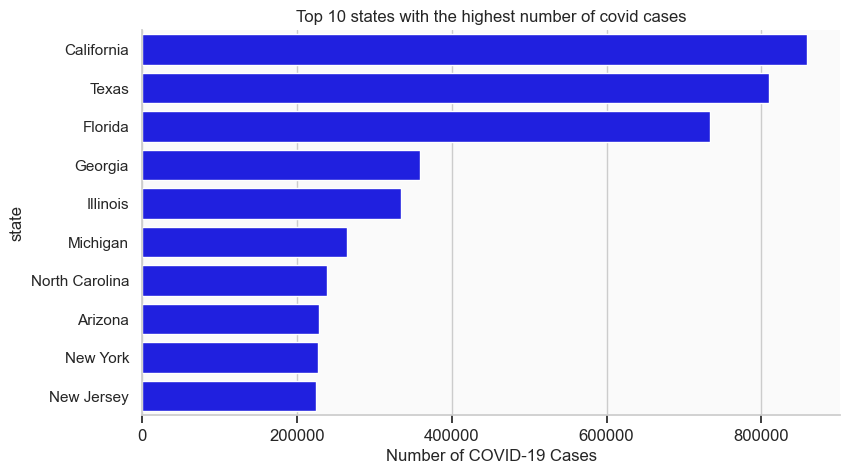

In [85]:
covid_cases_state_high = covid_cases_state.sort_values('tot_cases', ascending = False)
covid_cases_state_high = covid_cases_state_high.head(10)
ax = sns.barplot(x = 'tot_cases', y = 'state', data = covid_cases_state_high, color = 'blue')
ax.set_title('Top 10 states with the highest number of covid cases')
ax.set_xlabel('Number of COVID-19 Cases')
ax.set_ylabel('state')
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False})
ax.figure.set_size_inches(9, 5)
sns.despine()


##### The following code sorts values in a descending order to see states with the lowest number of cases. Note that the small states like New Jersey, Connecticut and Maine had very low number of COVID cases due to its low population so, it was inevitable that there COVID cases would have been low as well. Since, large states like Texas and California had highest number of cases, I took medium size states. We see that states like Arkansas, Kansas, Nebraska and South and North Dakota  had less COVID cases compared to states like California and North Carolina and so, people preferred Trump since, they didn't face COVID-19 with the same intensity so they had less preference on strong health policies and reforms. This matches our hypotheses!

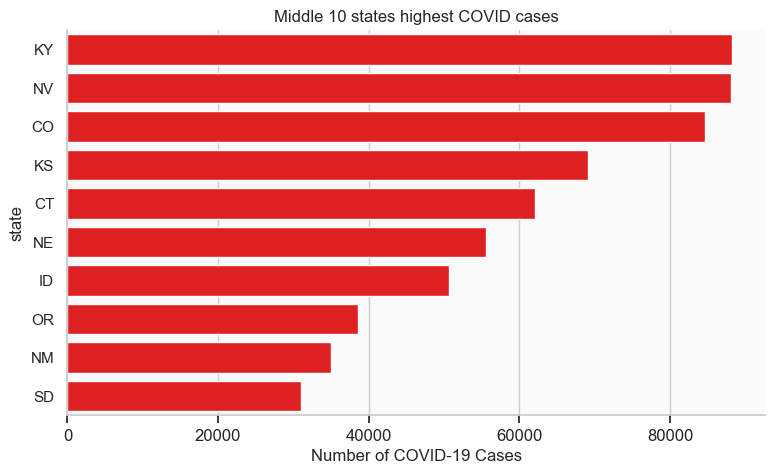

In [86]:
covid_cases_state_low = covid_cases_state.sort_values('tot_cases', ascending = False)
covid_cases_state_low = covid_cases_state_low.iloc[29:-12]
ax = sns.barplot(x = 'tot_cases', y = 'state_code', data = covid_cases_state_low, color = 'red')
ax.set_xlabel('Number of COVID-19 Cases')
ax.set_ylabel('state')
ax.set_title('Middle 10 states highest COVID cases')
sns.set_style(
    style='whitegrid',
    rc={"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': False})
ax.figure.set_size_inches(9, 5)
sns.despine()

##### The following code below shows a heat map with the covid cases of all states. We see that the states with high number of cases (dark green regions) Biden recieved a high average positive tweet sentiment as well as the votes population proportion. States like California, Pennsylvania and New York recieved high average positive sentiment as well as high total cases and so, Biden ended up winning in the aforementioned states!

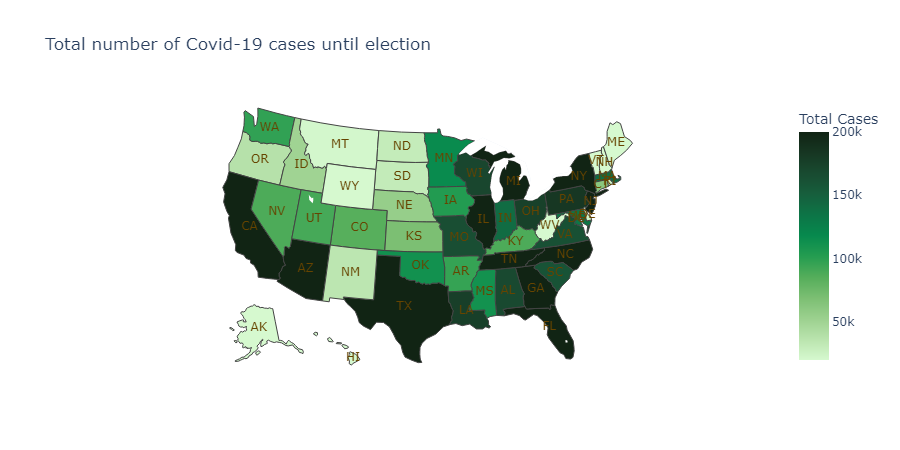

In [87]:
fig = px.choropleth(covid_cases_state,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='tot_cases',
                    range_color = (20000,200000),
                    color_continuous_scale=('algae'),
                    color_continuous_midpoint=0,
                    title = 'Total number of Covid-19 cases until election'
                    )


fig.add_scattergeo(
    locations= covid_cases_state['state_code'],
    locationmode="USA-states", 
    text= covid_cases_state['state_code'],
    mode='text',
    textfont=dict(color='#664400')
)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Total Cases"
    ))
# fig.show()
display.Image(r"C:\Users\danis\Downloads\map10.png")

# Final Project

##### In the final module of this project, a number of models for economic analyses is given including a time-series analysis, ordinary least squares (OLS) regression and machine learning models including regression trees.

### Time-Series Graphs

##### The following code below outputs a time-series graph that shows a distribution of the positive tweets of Biden throughout USA and shows the changes of positive sentiment score throughout the 20 days of the tweet data available from October 15th to November 3rd of 2020. The time-series grpah below is a simple moving average of the positive sentiment score for Biden. I used two different time-windows, a 3 hour one and a 24 hour one. A 3-hour time window means that the moving average is calculated based on the data from the previous 3 hours, while a 24-hour window means that the moving average is calculated based on the data from the previous 24 hours. Note that the averages are of the positive sentiment score of the tweets of those previous hours. The main difference between using a 3-hour time window and a 24-hour window is the level of sensitivity and responsiveness to changes in the data. A 3-hour window will respond more quickly to short-term fluctuations in the data, while a 24-hour window will be slower to respond to short-term fluctuations and will provide a smoother representation of the overall trend.
##### Note that the overall trend for the positive sentiment score up to the election date for Biden is positive and increasing for both time windows along with fluctuations of course which makes sense as he won the elctions.

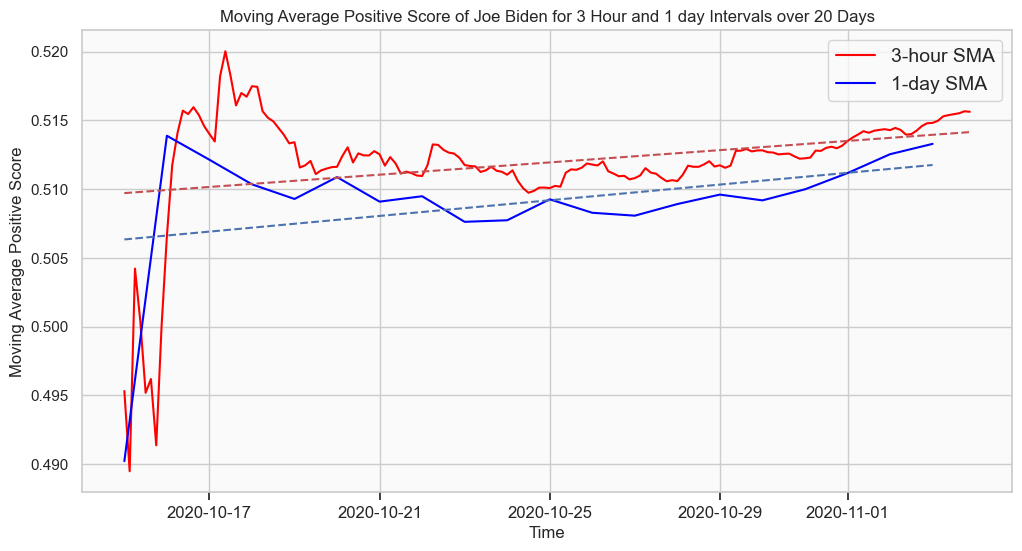

In [88]:
state_opb = state_op.loc[state_op['Candidate Name'] == 'Joe Biden']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_opb['created_at'] = pd.to_datetime(state_opb['created_at'])

# Set 'created_at' column as the index
state_opb = state_opb.set_index('created_at')

# Calculate the mean negative score for each 30-minute interval
pos_scores_1 = state_opb['positive'].resample('180T').mean()
pos_scores_2 = state_opb['positive'].resample('1440T').mean()

# Calculate the rolling 20-day moving average of the mean negative score
rolling_avg_1 = pos_scores_1.rolling('20D').mean()
rolling_avg_2 = pos_scores_2.rolling('20D').mean()

# Plot the rolling average on a graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rolling_avg_1, color='red', linewidth=1.5)
ax.plot(rolling_avg_2, color = 'blue', linewidth = 1.5)

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Moving Average Positive Score')
ax.set_title('Moving Average Positive Score of Joe Biden for 3 Hour and 1 day Intervals over 20 Days')
ax.legend(labels =['3-hour SMA', '1-day SMA'], fontsize=14)

# Add regression lines to the plot
z1 = np.polyfit(rolling_avg_1.index.astype('int64') // 10**9, rolling_avg_1, 1)
p1 = np.poly1d(z1)
ax.plot(rolling_avg_1.index, p1(rolling_avg_1.index.astype('int64') // 10**9), "r--", linewidth=1.5)

z2 = np.polyfit(rolling_avg_2.index.astype('int64') // 10**9, rolling_avg_2, 1)
p2 = np.poly1d(z2)
ax.plot(rolling_avg_2.index, p2(rolling_avg_2.index.astype('int64') // 10**9), "b--", linewidth=1.5)

plt.show()

##### The following code below outputs a time-series graph that shows a distribution of the negative tweets of Biden throughout USA and shows the changes of negative sentiment score throughout the 20 days of the tweet data available from October 15th to November 3rd of 2020. The time-series graph below is a simple moving average of the negative sentiment score for Biden. I used two different time-windows, a 3 hour one and a 24 hour one  as done previously. The y-axis here might seem unintuitive but since, there is negative score the more negative a number is the stronger the negative sentiment. Note that the overall trend for the negative sentiment score up to the election date for Biden is positive and increasing for both time windows which indicates that as the elction came closer, the negtaive sentiment was decreasing for Biden on Twitter. This makes perfect sense given that Biden won the elections.

##### One interesting observation is the huge rise in the negative sentiment for Biden between 16 and 17 October when we observe the 1 day moving average. On some further research we found that on between those days, Twitter put an end to blocking users who shared about an unconfirmed article from the New York Post about former Vice President Joe Biden's son Hunter. The article discussed about some alleged emails between a Ukrainian energy executive and Hunter Biden which became a controversy since, it was percieved aginst the interest of US. 

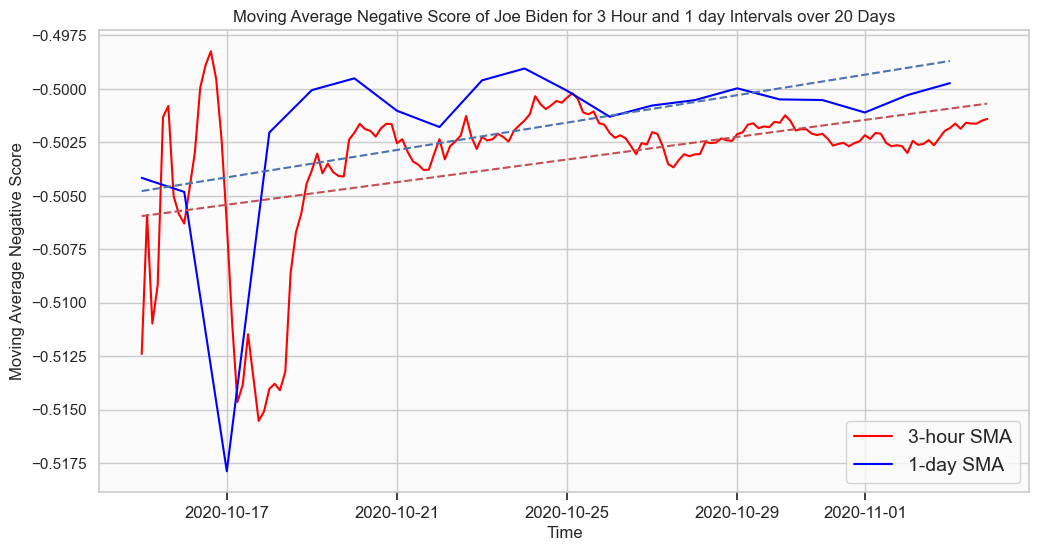

In [89]:
state_onb = state_on.loc[state_on['Candidate Name'] == 'Joe Biden']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_onb['created_at'] = pd.to_datetime(state_onb['created_at'])

# Set 'created_at' column as the index
state_onb = state_onb.set_index('created_at')

# Calculate the mean negative score for each 30-minute interval
neg_scores_3hr = state_onb['negative'].resample('180T').mean()
neg_scores_24hr = state_onb['negative'].resample('1440T').mean()

# Calculate the rolling 20-day moving average of the mean negative score
rolling_avg_1 = neg_scores_3hr.rolling('20D').mean()
rolling_avg_2 = neg_scores_24hr.rolling('20D').mean()

# Plot the rolling average on a graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rolling_avg_1, color='red', linewidth = 1.5)
ax.plot(rolling_avg_2, color = 'blue', linewidth = 1.5)

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Moving Average Negative Score')
ax.set_title('Moving Average Negative Score of Joe Biden for 3 Hour and 1 day Intervals over 20 Days')
ax.legend(labels =['3-hour SMA', '1-day SMA'], fontsize=14)

# Add regression lines to the plot
z1 = np.polyfit(rolling_avg_1.index.astype('int64') // 10**9, rolling_avg_1, 1)
p1 = np.poly1d(z1)
ax.plot(rolling_avg_1.index, p1(rolling_avg_1.index.astype('int64') // 10**9), "r--", linewidth=1.5)

z2 = np.polyfit(rolling_avg_2.index.astype('int64') // 10**9, rolling_avg_2, 1)
p2 = np.poly1d(z2)
ax.plot(rolling_avg_2.index, p2(rolling_avg_2.index.astype('int64') // 10**9), "b--", linewidth=1.5)

plt.show()


##### The following code below outputs a time-series graph that shows a distribution of the positive tweets of Trump throughout USA and shows the changes of positive sentiment score throughout the 20 days of the tweet data available from October 15th to November 3rd of 2020. The time-series graph below is a simple moving average of the positive sentiment score for Trump. I used two different time-windows, a 3 hour one and a 24 hour one  as done previously. Note that the overall trend for the positive sentiment score up to the election date for Trump is positive and increasing for both time windows which indicates that as the elction came closer, the positive sentiment was increasing for Trump on Twitter. Note that when we compare the moving averages to the positive sentiment of Biden, we see that both time windows were increasing at the same rate but this is not true for Trump. Trump's daily moving average has a smaller slope meaning that his positive score is increasing at a slower rate indicating that his positive sentiment was decreasing as the election came closer.

##### One interesting observation is the huge rise in the positive sentiment for Trump between 16 and 17 October when we observe the 1 day and the 2 hour moving average. This goes hand-in-hand with our observation of the story of the article that circulated. The controversy gave an edge to Trump's campaign and so his positive sentiment on Twitter increased!

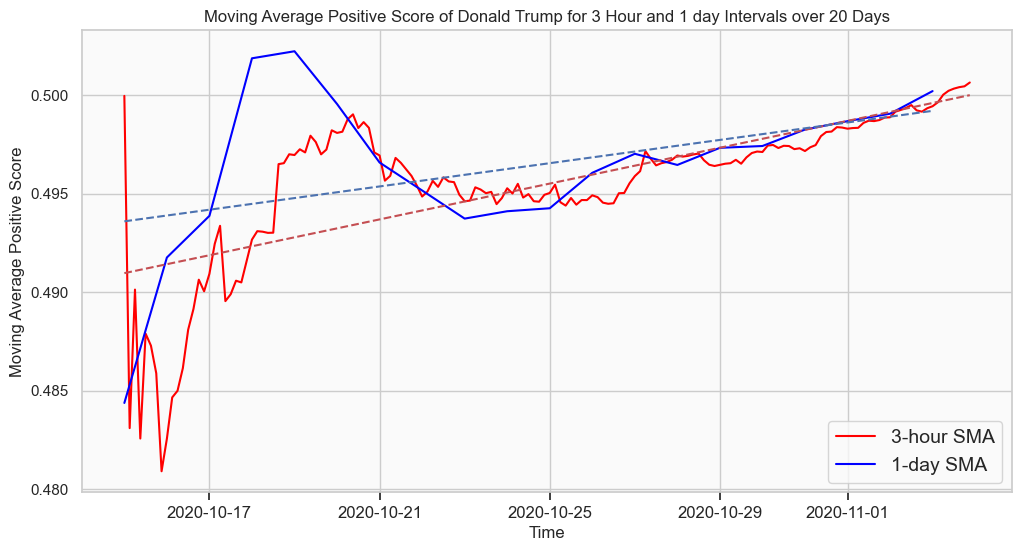

In [90]:
state_opt = state_op.loc[state_op['Candidate Name'] == 'Donald Trump']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_opt['created_at'] = pd.to_datetime(state_opt['created_at'])

# Set 'created_at' column as the index
state_opt = state_opt.set_index('created_at')

# Calculate the mean negative score for each 30-minute interval
pos_scores_3hr = state_opt['positive'].resample('180T').mean()
pos_scores_24hr = state_opt['positive'].resample('1440T').mean()

# Calculate the rolling 20-day moving average of the mean negative score
rolling_avg_1 = pos_scores_3hr.rolling('20D').mean()
rolling_avg_2 = pos_scores_24hr.rolling('20D').mean()

# Plot the rolling average on a graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rolling_avg_1, color='red', linewidth=1.5)
ax.plot(rolling_avg_2, color = 'blue', linewidth = 1.5)
# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Moving Average Positive Score')
ax.set_title('Moving Average Positive Score of Donald Trump for 3 Hour and 1 day Intervals over 20 Days')

ax.legend(labels =['3-hour SMA', '1-day SMA'], fontsize=14)

# Add regression lines to the plot
z1 = np.polyfit(rolling_avg_1.index.astype('int64') // 10**9, rolling_avg_1, 1)
p1 = np.poly1d(z1)
ax.plot(rolling_avg_1.index, p1(rolling_avg_1.index.astype('int64') // 10**9), "r--", linewidth=1.5)

z2 = np.polyfit(rolling_avg_2.index.astype('int64') // 10**9, rolling_avg_2, 1)
p2 = np.poly1d(z2)
ax.plot(rolling_avg_2.index, p2(rolling_avg_2.index.astype('int64') // 10**9), "b--", linewidth=1.5)

plt.show()

##### The following code below outputs a time-series graph that shows a distribution of the negative tweets of Trump throughout USA and shows the changes of negative sentiment score throughout the 20 days of the tweet data available from October 15th to November 3rd of 2020. The time-series graph below is a simple moving average of the positive sentiment score for Trump. I used two different time-windows, a 3 hour one and a 24 hour one  as done previously. Note that the overall trend for the negative sentiment score up to the election date for Trump is negative and increasing for both time windows which indicates that as the election came closer, the negative sentiment was increasing for Trump on Twitter. This makes sense as the election came closer Trump was becoming more and more unpopular and the hate towards him was increasing given that the negative scores were increasing (negative slope as moving towards election). Thus, he lost the overall election in USA!

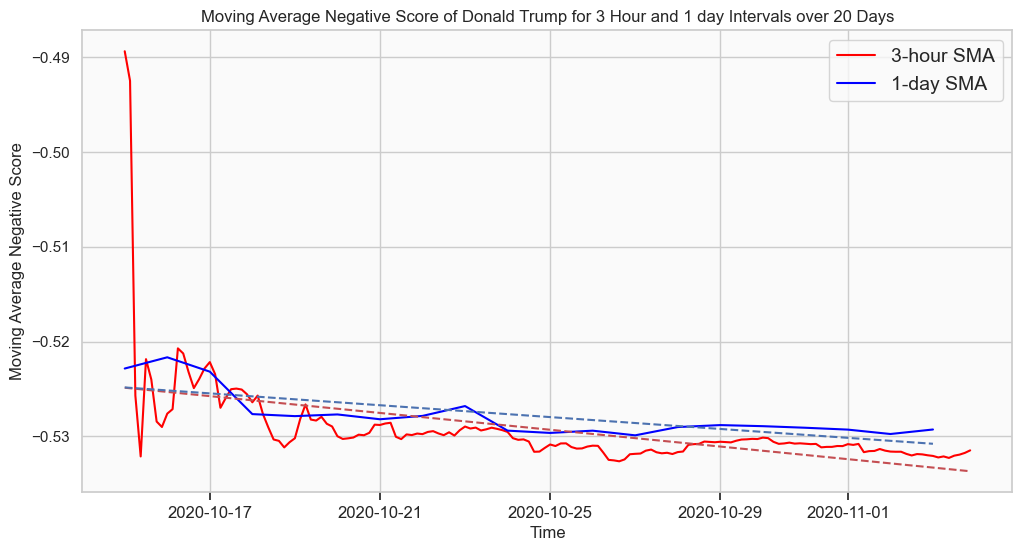

In [91]:
state_ont = state_on.loc[state_on['Candidate Name'] == 'Donald Trump']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_ont['created_at'] = pd.to_datetime(state_ont['created_at'])

# Set 'created_at' column as the index
state_ont = state_ont.set_index('created_at')

# Calculate the mean negative score for each 30-minute interval
neg_scores_3hr = state_ont['negative'].resample('180T').mean()
neg_scores_24hr = state_ont['negative'].resample('1440T').mean()
# Calculate the rolling 20-day moving average of the mean negative score
rolling_avg_1 = neg_scores_3hr.rolling('20D').mean()
rolling_avg_2 = neg_scores_24hr.rolling('20D').mean()
# Plot the rolling average on a graph
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rolling_avg_1, color='red', linewidth=1.5)
ax.plot(rolling_avg_2, color = 'blue', linewidth = 1.5)

# Set the axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Moving Average Negative Score')
ax.set_title('Moving Average Negative Score of Donald Trump for 3 Hour and 1 day Intervals over 20 Days')

ax.legend(labels =['3-hour SMA', '1-day SMA'], fontsize=14)
# Display the graph

# Add regression lines to the plot
z1 = np.polyfit(rolling_avg_1.index.astype('int64') // 10**9, rolling_avg_1, 1)
p1 = np.poly1d(z1)
ax.plot(rolling_avg_1.index, p1(rolling_avg_1.index.astype('int64') // 10**9), "r--", linewidth=1.5)

z2 = np.polyfit(rolling_avg_2.index.astype('int64') // 10**9, rolling_avg_2, 1)
p2 = np.poly1d(z2)
ax.plot(rolling_avg_2.index, p2(rolling_avg_2.index.astype('int64') // 10**9), "b--", linewidth=1.5)


plt.show()


### OLS Regression

##### Throughout the project the aim was to provide evidence that the twitter data and the public engagement on the social media platform had some impact on the election results and that Sentiment Analysis can play a good role in predicting election results. The final results do indicate that tweet count has a strong positive corelation with the number of votes recieved by each candidate in the respective states but unfortunately, we run into some issues when it came to predicting tweet count with our independent variables.

##### The idea behind the project was to observe over how my independent variables including likes, user followers count and retweet count had on impact on the number of tweets (dependent) for each candidate and ultimately the vote count (that would depend on the tweet_count). The intuition behind the idea was that when people like a tweet, retweet a tweet and show engagement, it would indicate that they are supporting or showing some sort of emotion for that candidate. Similarly, the more number of people who follow the person who tweete the accessibility of the political agenda would be wide spread and would increases. Thus, such variables should increase the number of tweet count for that time period as well. Note that in project 1 I tried to show the relationship between the averages of my independent variables with vote counts that came out to be very weak. Now in my regressions, I take an alternative path and check whether my independent variables has any relation with tweet count. 

##### Note that for most of the part, the relations and results I described previously were state-level. This constrained me to analyze and discuss about 50 observations and the tweet features in those specific states. This reduced the number of observations and so, if I would run regressions based on state, my OLS results would be inadequate. To cater for this issue, I decided to run regressions for my four data frames in particular, the individual positive and negative sentiment for both Donald Trump and Joe Biden. All the data frames had over 20,000 observations which would make my regression results acceptable as shown below. 

In [92]:
print(state_onb['tweet'].count())
print(state_opb['tweet'].count())
print(state_ont['tweet'].count())
print(state_opt['tweet'].count())

21560
27118
38114
34773


##### I distributed each data frame into 10 minute time intervals (as we had time data for each tweet) for four separate regression and to show the the relationship between my dependent variable (the number of tweets or tweet count) and the independent variables (number of likes, user follower count, retweet_count) as mentioned in project 1 for each time interval rather than states. Although I used the averages of my variables previously, here I will use the counts of the said variables. Moreover, each data frame after the data manipulation ends with 2880 observations which makes sense as there 2880 10-minute intervals in 20 days!

##### The first regression we do is on the data frame that contains all the positive tweets for Donald Trump. We observe for Trump's positive tweets over how number of tweets are affected by the dependent variables includiing number of likes etc. 

##### The code below uses the data set that uses all positive tweets of Donald Trump. It first categroizes all the tweets between their respective time periods. We had to change the the time column into the right format. It makes three data sets based off the independent variables and then resample and put each tweet in the 10 minute time intervals for each variable and sum up all the numbers for that time interval. We then merge the three data sets together on the common column.

In [93]:
state_opt = state_op.loc[state_op['Candidate Name'] == 'Donald Trump']

# converting 'created_at' column to datetime format
state_opt['created_at'] = pd.to_datetime(state_opt['created_at'])

# Set 'created_at' column as the index
state_opt = state_opt.set_index('created_at')

# Calculate the mean negative score for each 30-minute interval
total_likes_10_min = state_opt['likes'].resample('10T').sum()
total_user_followers_count_10_min = state_opt['user_followers_count'].resample('10T').sum()
total_retweet_count_10_min = state_opt['retweet_count'].resample('10T').sum()

pos_likes = pd.DataFrame(total_likes_10_min).reset_index()
pos_user_follower = pd.DataFrame(total_user_followers_count_10_min).reset_index()
pos_retweet = pd.DataFrame(total_retweet_count_10_min).reset_index()
time_data_opt = pd.merge(pos_likes, pos_retweet, on = 'created_at')
time_data_opt = pd.merge(pos_user_follower, time_data_opt, on = 'created_at')


##### The following code makes use of a column to count the number of tweets in a specific time interval. It also adds the constant column containing 1's for intercept purposes. 

In [94]:
state_opt_time = state_opt['source'].resample('10T').count()
state_opt_time = pd.DataFrame(state_opt_time).reset_index()
time_data_opt = pd.merge(state_opt_time, time_data_opt, on = 'created_at')
time_data_opt = time_data_opt.rename(columns = {'source': 'tweet_count'})
time_data_opt['const'] = 1

##### We now fix our 3 models respectively with our variables. The main linear relation that I hypothesized was between tweet count with retweet counts. This relation makes sense as more people retweet a single tweet, it should increase the number of tweets given the person who retweets also use a similar hashtag in their retweets! This would of course increase the number of tweets. I then use my other independent variables including likes and user followers count to conduct the multiple linear regression model for the data frame I have been using for this particular case which is the positive tweets of Trump. 
##### The number of likes for this regression is used because I hypothesized that the number of likes on a positive tweet would motivate people to share those tweets which they liked and retweet them. Including the number of likes makes sense as previously mentioned where number of likes indicate the likeability of a candidate and their political agenda. 
##### The number of user followers count for each tweet is also an important factor to predict the number of tweets. When people with high number of followers tweet out about a political party or an organization, they reach out to a wider audience with their ideas which would increase the number of tweets as more people would tweet about that idea assuming that people with high followers have more influence on social media.

In [95]:
X1 = ['const', 'retweet_count']
X2 = ['const', 'retweet_count', 'likes']
X3 = ['const', 'retweet_count', 'likes', 'user_followers_count']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(time_data_opt['tweet_count'], time_data_opt[X1], missing='drop').fit()
reg2 = sm.OLS(time_data_opt['tweet_count'], time_data_opt[X2], missing='drop').fit()
reg3 = sm.OLS(time_data_opt['tweet_count'], time_data_opt[X3], missing='drop').fit()

##### The table shows the results of an Ordinary Least Squares (OLS) regression analysis with the dependent variable 'tweet_count' and three independent variables: 'likes', 'retweet_count' and 'user_followers_count'. The table reports the coefficients, standard errors, and p-values of the estimated regression coefficients etc.

##### Model 1 includes the independent variables, constant term and retweet count, which has a statistically significant positive coefficient of 11.774 with a standard error of 0.198. This means that the predicted tweet count would be 11.774 when all other independent variables are equal to zero. the coefficient for 'retweet_count' is also positive and statistically significant at the 1% level, indicating that a one-unit increase in 'retweet_count' is associated with a 0.011 increase in the predicted tweet count.

##### In Model 2, 'likes' is added as independent variables along with 'retweet_count'. The coefficient for 'likes' is positive and statistically significant at the 1% level (p<0.01), which means that a one-unit increase in 'likes' is associated with a 0.005 increase in the predicted tweet count, holding all other independent variables constant. 

##### In Model 3, 'user_followers_count' is added as another independent variable. The coefficient for 'user_followers_count' is positive and statistically significant at the 1% level, implying that a one-unit increase in 'user_followers_count' is associated with a 0.000 increase in the predicted tweet count, holding all other independent variables constant. Additionally, 'retweet_count' becomes statistically insignificant at the 1% level, while 'likes' remains significant at the 1% level.

##### The R-squared value measures how well the model fits the data. In Model 1, the R-squared value is 0.020, which means that the constant term explains only 2.0% of the variation in the dependent variable. In Model 2, the R-squared value increases to 0.034, indicating that 'likes' and 'retweet_count' explain an additional 1.4% of the variation. In Model 3, the R-squared value increases significantly to 0.102, indicating that the addition of 'user_followers_count' explains a further 6.8% of the variation.

##### The F statistic tests the overall significance of the model. In Model 1, the F statistic is statistically significant at the 1% level, indicating that the constant term adn retweet count are a significant predictor of the dependent variable. In Model 2 and Model 3, the F statistic is also statistically significant at the 1% level, suggesting that the addition of independent variables has improved the model's predictive power.

##### In summary, the regression analysis suggests that 'likes', 'retweet_count', and 'user_followers_count' are significant predictors of the dependent variable 'tweet_count'. The model with all three independent variables has the highest predictive power, explaining 10.2% of the variation in 'tweet_count'.

##### The equation for this regression with all of my 3 independent variables is the following;
##### trump_positive_tweet_count = 10.871 - 0.009 * retweet_count + 0.003 * likes  + 0.000 * user_followers_count + error 
##### where;
##### From our results, we see that

- The intercept $ \hat{\beta}_0 = 10.871 $.  
- The slope $ \hat{\beta}_1 = -0.009 $.
- The slope $ \hat{\beta}_2 = 0.003 $.
- The slope $ \hat{\beta}_3 = 0.000 $. 


In [96]:
stargazer = Stargazer([reg1,reg2,reg3])
stargazer.title('OLS Regression for Positive Tweets of Trump')
HTML(stargazer.render_html())

##### We now do the same regression with similar independent variables for the negative tweets of Trump with the same intuition where more number of likes, user follower count and retweet count would increase the number of tweets for Trump in that time period. 

##### We did a similar procedure for the negative tweets as done previously for the positive tweets of Trump in terms of data wrangling and the data frame setup to perform our regression. We performed this regression to see the relationship between our independent variables for all negative tweets of Trump. 

In [97]:
state_ont = state_on.loc[state_on['Candidate Name'] == 'Donald Trump']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_ont['created_at'] = pd.to_datetime(state_ont['created_at'])

# Set 'created_at' column as the index
state_ont = state_ont.set_index('created_at')

# Calculate the mean negative score for each 10-minute interval
total_likes_15_min = state_ont['likes'].resample('10T').sum()
total_user_followers_count_15_min = state_ont['user_followers_count'].resample('10T').sum()
total_retweet_count_15_min = state_ont['retweet_count'].resample('10T').sum()

In [98]:
pos_likes = pd.DataFrame(total_likes_15_min)
pos_user_follower = pd.DataFrame(total_user_followers_count_15_min)
pos_retweet = pd.DataFrame(total_retweet_count_15_min)
pos_likes = pos_likes.reset_index()
pos_user_follower = pos_user_follower.reset_index()
pos_retweet = pos_retweet.reset_index()
time_data_ont = pd.merge(pos_likes, pos_retweet, on = 'created_at')
time_data_ont = pd.merge(pos_user_follower, time_data_ont, on = 'created_at')

In [99]:
state_ont_time = state_ont['source'].resample('10T').count()
state_ont_time = pd.DataFrame(state_ont_time).reset_index()
time_data_ont = pd.merge(state_ont_time, time_data_ont, on = 'created_at')
time_data_ont = time_data_ont.rename(columns = {'source': 'tweet_count'})
time_data_ont['const'] = 1

##### We first add the constant and retweet count as the independent variables for our first model, followed by likes in our second model followed by user followers count in our final model and observe how our models gets better or worse when adding multiple variables.

In [100]:
X1 = ['const', 'retweet_count']
X2 = ['const', 'retweet_count', 'likes']
X3 = ['const', 'retweet_count', 'likes', 'user_followers_count']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(time_data_ont['tweet_count'], time_data_ont[X1], missing='drop').fit()
reg2 = sm.OLS(time_data_ont['tweet_count'], time_data_ont[X2], missing='drop').fit()
reg3 = sm.OLS(time_data_ont['tweet_count'], time_data_ont[X3], missing='drop').fit()

##### Below are the OLS regression results for a multiple linear regression model with tweet_count as the dependent variable and likes, retweet_count, and user_followers_count as the independent variables.

##### The coefficients of determination (R-squared) in the three models are 0.017, 0.019, and 0.090, respectively, which indicates that the models explain only a small proportion of the total variation in tweet_count. Note that since the value is increasing for every subsequent model, it indicates that each model is better than the previous one by adding more variables!

##### The regression coefficients for the constant term are statistically significant in all three models, with p-values less than 0.01, indicating that there is a statistically significant intercept term even when all the independent variables are zero. The coefficient for likes is statistically significant at the 5% level (p<0.05) in model 2, but not in model 3. The coefficient is positive, which indicates that as likes increase, tweet_count increases as well in model 2.

##### The coefficient for retweet_count is statistically significant at the 1% level (p<0.01) in model 1 and statistically significant at the 5% level (p<0.05) in model 3, but not in model 2. The coefficient is positive in all three models, indicating that as retweet_count increases, tweet_count increases as well.

##### The coefficient for user_followers_count is statistically significant at the 1% level (p<0.01) in model 3, and the coefficient is zero, indicating that user_followers_count has no relationship with tweet count in this model. The F-statistic for each model is statistically significant at the 1% level (p<0.01), indicating that there is strong evidence that at least one of the independent variables is related to the dependent variable.

##### The residual standard errors (RSE) in the three models are 11.269, 11.260, and 10.845, respectively. The RSE represents the average amount that the actual tweet_count values differ from the predicted values based on the regression equation. The lower the RSE, the better the model fits the data. The RSE is smallest in model 3, indicating that this model provides the best fit to the data among the three models.


##### The equation for this regression with all of my 3 independent variables is the following;
##### trump_negative_tweet_count = 12.079 + 0.005 * retweet_count - 0.001 * likes  + 0.000 * user_followers_count + error 
##### where;
##### From our results, we see that in model 3 we have

- The intercept $ \hat{\beta}_0 = 12.079 $.  
- The slope $ \hat{\beta}_1 = 0.005 $.
- The slope $ \hat{\beta}_2 = -0.001 $.
- The slope $ \hat{\beta}_3 = 0.000 $. 


In [101]:
stargazer = Stargazer([reg1,reg2,reg3])
stargazer.title('OLS Regression for Negative Tweets of Trump')
HTML(stargazer.render_html())

##### We perform a same regression model with similar independent variables for the positivee tweets of Biden with the same intuition where more number of likes, user follower count and retweet count would increase the number of tweets for Biden in that time period. We do data wrangling to divide the tweets and their respective features with their respective time frames as mentioned before to see the results of our linear regression.

In [102]:
state_opb = state_op.loc[state_op['Candidate Name'] == 'Joe Biden']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_opb['created_at'] = pd.to_datetime(state_opb['created_at'])

# Set 'created_at' column as the index
state_opb = state_opb.set_index('created_at')

# Calculate the mean negative score for each 10-minute interval
total_likes_15_min = state_opb['likes'].resample('10T').sum()
total_user_followers_count_15_min = state_opb['user_followers_count'].resample('10T').sum()
total_retweet_count_15_min = state_opb['retweet_count'].resample('10T').sum()

##### The following code convert the series and converts them into a dataframe so we can merge it with our data set for which we perform the regression.

In [103]:
pos_likes = pd.DataFrame(total_likes_15_min)
pos_user_follower = pd.DataFrame(total_user_followers_count_15_min)
pos_retweet = pd.DataFrame(total_retweet_count_15_min)
pos_likes = pos_likes.reset_index()
pos_user_follower = pos_user_follower.reset_index()
pos_retweet = pos_retweet.reset_index()

time_data_opb = pd.merge(pos_likes, pos_retweet, on = 'created_at')
time_data_opb = pd.merge(pos_user_follower, time_data_opb, on = 'created_at')

In [104]:
state_opb_time = state_opb['source'].resample('10T').count()
state_opb_time = pd.DataFrame(state_opb_time).reset_index()
time_data_opb = pd.merge(state_opb_time, time_data_opb, on = 'created_at')
time_data_opb = time_data_opb.rename(columns = {'source': 'tweet_count'})
time_data_opb['const'] = 1

##### We add the constant (for intercept purposes) and retweet count as the independent variables for Model 1, followed by likes in Model 2 followed by user followers count in Model 3 and observe how our models gets better or worse when adding multiple variables.

In [105]:
X1 = ['const', 'retweet_count']
X2 = ['const', 'retweet_count', 'likes']
X3 = ['const', 'retweet_count', 'likes', 'user_followers_count']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(time_data_opb['tweet_count'], time_data_opb[X1], missing='drop').fit()
reg2 = sm.OLS(time_data_opb['tweet_count'], time_data_opb[X2], missing='drop').fit()
reg3 = sm.OLS(time_data_opb['tweet_count'], time_data_opb[X3], missing='drop').fit()

##### This table shows the results of an Ordinary Least Squares (OLS) regression for positive tweets of Biden. The dependent variable is the count of positive tweets of Biden, and the independent variables are likes, retweet_count, and user_followers_count.

##### Model 1 includes the constant term and has a coefficient estimate of 9.297, indicating that the predicted value of the dependent variable is 9.297 when all independent variables are zero. It also contains the retweet count where the coefficient estimate is statistically significant at the 1% level and positive (0.003), which means that an increase in the number of retweets is associated with an increase in the count of positive tweets of Biden. 

##### Model 2 includes likes and retweet_count as independent variables. The coefficient estimate for likes is statistically significant at the 1% level and negative (-0.002), which means that an increase in the number of likes is associated with a decrease in the count of positive tweets of Biden. The coefficient estimate for retweet_count is statistically significant at the 1% level and positive (0.016), which means that an increase in the number of retweets is associated with an increase in the count of positive tweets of Biden.

##### Model 3 includes all three independent variables, and the coefficient estimate for user_followers_count is statistically significant at the 1% level and positive (+ 0.000), indicating that an increase in the number of followers is associated with an increase in the count of positive tweets of Biden (although a very small one). 

##### The R-squared values in each model indicate the proportion of variation in the dependent variable that is explained by the independent variables. Model 3 has the highest R-squared value (0.087), indicating that the independent variables in that model explain more of the variation in the dependent variable than the independent variables in the other two models. However, the R-squared values are all relatively low, indicating that there may be other important factors that are not captured by the independent variables in these models.

##### The F statistic tests the overall significance of the regression model, with higher values indicating a better fit. All three models have statistically significant F statistics, with Model 3 having the highest F statistic, indicating a better fit.

##### In conclusion, the results suggest that an increase in the number of likes is associated with a decrease in the count of positive tweets of Biden, while an increase in the number of retweets and followers is associated with an increase in the count of positive tweets of Biden. However, the explanatory power of the models is relatively low, indicating that other factors may also influence the count of positive tweets of Biden.

##### The equation for this regression with all of my 3 independent variables is the following;
##### biden_positive_tweet_count = 8.371 + 0.004 * retweet_count - 0.000 * likes  + 0.000 * user_followers_count + error
##### where;
##### From our results, we see that in model 3 we have

- The intercept $ \hat{\beta}_0 = 8.371 $.  
- The slope $ \hat{\beta}_1 = 0.004 $.
- The slope $ \hat{\beta}_2 = -0.000 $.
- The slope $ \hat{\beta}_3 = 0.000 $. 


In [106]:
stargazer = Stargazer([reg1,reg2,reg3])
stargazer.title('OLS Regression for Positive Tweets of Biden')
HTML(stargazer.render_html())

##### Our final regression is with the data set that contains the negative tweets of Joe Biden. We observe how variables like retweet count and user followers count could increase the number of negative tweets recieved by Biden during the last 20 days of the election.  

In [107]:
state_onb = state_on.loc[state_on['Candidate Name'] == 'Joe Biden']
# Load the time series data into a DataFrame and convert 'created_at' column to datetime format
state_onb['created_at'] = pd.to_datetime(state_onb['created_at'])

# Set 'created_at' column as the index
state_onb = state_onb.set_index('created_at')

# Calculate the mean negative score for each 10-minute interval
total_likes_15_min = state_onb['likes'].resample('10T').sum()
total_user_followers_count_15_min = state_onb['user_followers_count'].resample('10T').sum()
total_retweet_count_15_min = state_onb['retweet_count'].resample('10T').sum()

In [108]:
pos_likes = pd.DataFrame(total_likes_15_min)
pos_user_follower = pd.DataFrame(total_user_followers_count_15_min)
pos_retweet = pd.DataFrame(total_retweet_count_15_min)
pos_likes = pos_likes.reset_index()
pos_user_follower = pos_user_follower.reset_index()
pos_retweet = pos_retweet.reset_index()

In [109]:
time_data_onb = pd.merge(pos_likes, pos_retweet, on = 'created_at')
time_data_onb = pd.merge(pos_user_follower, time_data_onb, on = 'created_at')

In [110]:
state_onb_time = state_onb['source'].resample('10T').count()
state_onb_time = pd.DataFrame(state_onb_time).reset_index()
time_data_onb = pd.merge(state_onb_time, time_data_onb, on = 'created_at')
time_data_onb = time_data_onb.rename(columns = {'source': 'tweet_count'})
time_data_onb['const'] = 1

In [111]:
X1 = ['const', 'retweet_count']
X2 = ['const', 'retweet_count', 'likes']
X3 = ['const', 'retweet_count', 'likes', 'user_followers_count']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(time_data_onb['tweet_count'], time_data_onb[X1], missing='drop').fit()
reg2 = sm.OLS(time_data_onb['tweet_count'], time_data_onb[X2], missing='drop').fit()
reg3 = sm.OLS(time_data_onb['tweet_count'], time_data_onb[X3], missing='drop').fit()

##### The following OLS regression results table shows the relationship between negative tweets about Joe Biden (the dependent variable) and the three independent variables, the number of likes, the number of retweets, and the number of followers of the tweets in the specified time period. 

##### The constant term (the intercept) in each of the models represents the predicted number of negative tweets about Biden when all independent variables are equal to zero. In Model 1, the intercept is 7.328, which means that there is a predicted average of 7.328 negative tweets about Biden when all other independent variables are equal to zero. It also contains the retweet count where the coefficient estimate is statistically significant at the 1% level and positive (0.004), which means that an increase in the number of retweets is associated with an increase in the count of negative tweets of Biden. 

##### The coefficient for the number of likes in Model 2 is negative and statistically significant at the 1% level. This suggests that, on average, for every additional like, there is a decrease in negative tweets about Biden by 0.002. This finding may be interpreted as negative feedback, which tends to discourage individuals from sharing negative tweets about Biden.Moreover, in Model 2, the coefficient for the number of retweets is positive and statistically significant at the 1% level. This implies that for every additional retweet, there is a predicted increase in negative tweets about Biden by 0.017. This positive relationship is a concerning trend, as it suggests that negative tweets about Biden can spread quickly and widely on Twitter.

##### In Model 3, the coefficient for the number of followers is positive and statistically significant at the 1% level. This suggests that for every additional follower, there is a predicted increase in negative tweets about Biden by 0.000. This relationship is very weak but statistically significant, indicating that users with more followers may have a slightly stronger impact on the number of negative tweets about Biden.

##### The R-squared value for each model is relatively low, indicating that the independent variables explain only a small proportion of the variation in the dependent variable. The F-statistic for each model is statistically significant, which means that at least one of the independent variables has a significant effect on the dependent variable.

##### Overall, these results suggest that the number of retweets is the most important predictor of the number of negative tweets about Joe Biden, while the number of likes and followers have weaker and less consistent impact on the outcome variable. However, the independent variables explain only a small proportion of the variation in the dependent variable, indicating that other factors not included in the model are also important in determining the number of negative tweets about Biden.

##### The equation for this regression with all of my 3 independent variables is the following;
##### biden_negative_tweet_count = 8.371 - 0.003 * retweet_count - 0.000 * likes  + 0.000 * user_followers_count + error 
##### where;
##### From our results, we see that in model 3 we have

- The intercept $ \hat{\beta}_0 = 6.478 $.  
- The slope $ \hat{\beta}_1 = -0.003 $.
- The slope $ \hat{\beta}_2 = -0.000 $.
- The slope $ \hat{\beta}_3 = 0.000 $. 


In [112]:
stargazer = Stargazer([reg1,reg2,reg3])
stargazer.title('OLS Regression for Negative Tweets of Biden')
HTML(stargazer.render_html())


##### Although the four regressions we performed, showed us that all the independent had an extremely weak association with the number of tweets no matter if they were positive or negative whether the tweet belonged to Trump or Biden. However, I particularly saw that the number of retweets had a strong relation with the number of votes in each state. The following two regressions and their respective plots shows that for each candidate there is a strong impact of the number of tweets and the number of votes they recieved by state. Unfortunately, the regressions only contains the data points corresponding to the number of states however it was important to make sure that our basic hypothesis was good enough and that the twitter data had some limitations within. 

##### This OLS regression analysis shows the relationship between the total number of tweets and the total votes in a state during the election. The dependent variable is the total number of votes cast in the state, while the independent variable is the total number of tweets in the state.

##### The coefficient estimate for the total tweet count variable is positive and statistically significant at the 1% level. This implies that an increase in the total number of tweets about the election in a state is associated with an increase in the total number of votes cast in that state. The coefficient estimate suggests that a one-unit increase in the total tweet count is associated with an increase of 769.617 votes.

##### The R-squared value of 0.690 indicates that approximately 69% of the variation in the total number of votes can be explained by the total number of tweets. The adjusted R-squared value of 0.690 suggests that the model has a good fit with the data, even after adjusting for the number of independent variables. The high value of 0.690 suggests a strong positive associatioon between the tweet count and the total votes for Trump in all the states.

##### The residual standard error (RSE) of 798527 indicates that the average difference between the actual and predicted number of votes is approximately 800 thousand. This is a large difference in the context of election predictions. This large error occured because of the high variability of states who voted for trump. Moreover, the number of votes also varies state by state depending on the population and the number of counties and seats and so on. 

##### Overall, the results suggest that social media activity, as measured by the number of tweets related to the election, can be a significant predictor of voter turnout. Higher levels of social media activity does indicate greater engagement and enthusiasm among voters, leading to higher voter turnout.

In [113]:
final_trump = pd.merge(votes_pop_trump, tweet_count_trump, on = ['state', 'state_code', 'Candidate Name'])
final_trump['const'] = 1
model_trump = sm.OLS(final_trump['total_votes'], final_trump[['const', 'Total Tweet Count']], missing='drop').fit()
stargazer = Stargazer([model_trump])
stargazer.custom_columns(["Total Votes"],[1])
stargazer.title('OLS Regression between Total Votes and Tweets by State')
stargazer

##### The regression plot below confirms a positive corelation between the tweet count and the total votes for each state for Trump. 

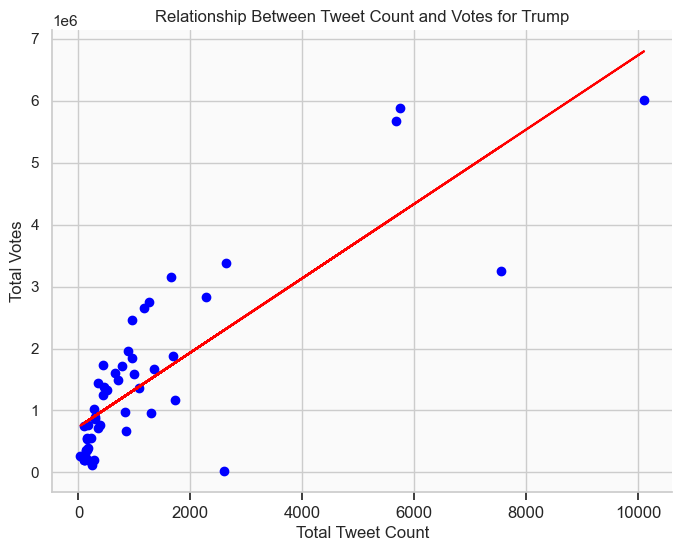

In [114]:
import numpy as np
import matplotlib.pyplot as plt

x = final_trump['Total Tweet Count']
y = final_trump['total_votes']

# Fit a polynomial regression model of degree 1 (linear regression) to the data
p = np.polyfit(x, y, 1)

# Generate the regression line using the poly1d function
line = np.poly1d(p)

# Create a scatter plot of the data
ax = plt.scatter(x, y, color = 'blue')

# Add the regression line to the plot
plt.plot(x, line(x), color='red')

# Add axis labels and a title
plt.xlabel('Total Tweet Count')
plt.ylabel('Total Votes')
plt.title('Relationship Between Tweet Count and Votes for Trump')
sns.despine()
ax.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})
plt.show()

##### The relationship between tweet count and vote count is much similar for Biden as well as shown below by the OLS regression results

In [115]:
final_bid = pd.merge(votes_pop_biden, tweet_count_biden, on = ['state', 'state_code', 'Candidate Name'])
final_bid['const'] = 1

##### The following code models the relationship between the total number of tweets (independent) and total number of votes (dependent) Biden recieved in each state. 

##### The coefficient estimate for the total tweet count variable is positive and statistically significant at the 1% level. This implies that an increase in the total number of tweets about the election in a state is associated with an increase in the total number of votes. The coefficient estimate suggests that a one-unit increase in the total tweet count is associated with an increase of 908.367 votes.

##### The intercept is also statistically significant at the 1% level, indicating that even in the absence of any tweets, there is still a significant number of votes for Biden. The coefficient estimate for the intercept term suggests that in the absence of any tweets, the total number of votes in the states is expected to be around 506,405.

##### The R-squared value of 0.851 indicates that approximately 85% of the variation in the total number of votes can be explained by the total number of tweets. The adjusted R-squared value of 0.848 suggests that the model has a good fit with the data, even after adjusting for the number of independent variables. Note that Biden has a much stronger relation with a much higher R-squared. It can not be a coincidence that in our data set the number of tweets for Biden for the last 20 days of the election is also very high as mentioned multiple times previously! Moreover, The residual standard error (RSE) of 754,344.517 indicates that the average difference between the actual and predicted number of votes is approximately 754,000. 

In [116]:
model_biden = sm.OLS(final_bid['total_votes'], final_bid[['const', 'Total Tweet Count']], missing='drop').fit()
stargazer = Stargazer([model_biden])
stargazer.custom_columns(["Total Votes"],[1])
stargazer.title('OLS Regression between Total Votes and Tweets by State')
stargazer

##### The following scatter plot shows the strong positive corelation between total tweets and total votes in all the states for Biden as predicted where high public engagement can predict election results on social media. 

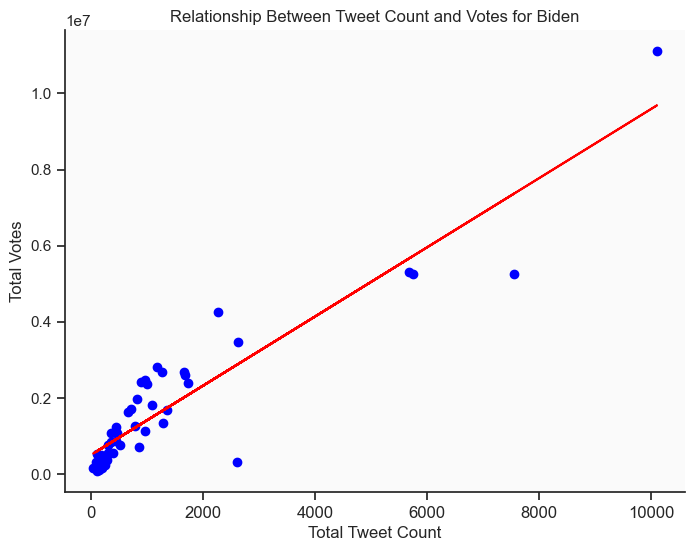

In [117]:
import numpy as np
import matplotlib.pyplot as plt

x = final_bid['Total Tweet Count']
y = final_bid['total_votes']

# Fit a polynomial regression model of degree 1 (linear regression) to the data
p = np.polyfit(x, y, 1)

# Generate the regression line using the poly1d function
line = np.poly1d(p)

# Create a scatter plot of the data
ax = plt.scatter(x, y, color = 'blue')

# Add the regression line to the plot
plt.plot(x, line(x), color='red')

# Add axis labels and a title
plt.xlabel('Total Tweet Count')
plt.ylabel('Total Votes')
plt.title('Relationship Between Tweet Count and Votes for Biden')
sns.despine()
ax.figure.set_size_inches(8, 6)
sns.set_style(style = 'white', rc = {"axes.facecolor": "#FAFAFA", 'xtick.bottom': True, 'ytick.left': True})
# Show the plot
plt.show()


### Machine Learning

#### Logistic Regression Model to predict whether a positive or negative tweet is about Donald Trump or Joe biden 

##### The following model uses the data set that contains all the positive and negative tweets of both the candidates and it then predicts whether a tweet is about Donald Trump or Joe Biden. The model was trained using data on the number of likes, retweets, and user followers for each tweet, and then tested on a separate set of tweets. The training data and test data was split with the 80/20 ratio rule where the training data set had 80% of the data while the data was tested on the rest of the 20% of the data set

In [118]:
X = pos_neg_only[['likes', 'retweet_count', 'user_followers_count']] # predictor variables
y = pos_neg_only['Candidate Name'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 18)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

##### This output shows that the accuracy of the model in predicting the Candidate of the tweets is around 59.3%. For a data with limitations this logistic regression model predicting which tweet belongs ot which candidate 60% of the time is quite good!

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)

Accuracy:
 0.5926459095956895


##### The confusion matrix indicates that out of 24,313 tweets in the testing set, 13,367 were correctly classified as being about Donald Trump, while 1,289 tweets were incorrectly classified as being about him when they were actually about Joe Biden. Similarly, out of 9,657 tweets about Joe Biden, only 1,042 were correctly classified, while 8,615 tweets were incorrectly classified as being about Donald Trump.

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[13367  1289]
 [ 8615  1042]]


##### The classification report shows that the precision of the model is around 61% for Donald Trump and only 45% for Joe Biden. This means that out of all the tweets that the model classified as being about Donald Trump, only 61% were actually about him, while the remaining 39% were falsely classified. Similarly, out of all the tweets that the model classified as being about Joe Biden, only 45% were actually about him, while the remaining 55% were falsely classified. The recall for Donald Trump is around 91%, which means that the model correctly identified 91% of all tweets that were actually about him. It's worth noting that Twitter data can be noisy and biased, and the model's performance might differ if it were tested on a different dataset or if different features were used to train it. 

In [121]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

Donald Trump       0.61      0.91      0.73     14656
   Joe Biden       0.45      0.11      0.17      9657

    accuracy                           0.59     24313
   macro avg       0.53      0.51      0.45     24313
weighted avg       0.54      0.59      0.51     24313



##### We made another logistic regression model that takes in the boolean variable of Sentiment. It predicts whether a tweet is positive or negative where our independent variables are likes, retweet counts and user followers count. 

In [122]:
X = pos_neg_only[['likes', 'retweet_count', 'user_followers_count']] # predictor variables
y = pos_neg_only['Sentiment'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)


##### This output shows that the accuracy of the model in predicting the Sentiment of the tweets is around 49.5%. A model that has 50/50 chance of predicting is not a very strong one and so, more data wrangling and issues needs to be catered in the data for a better accuracy. 

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)


Accuracy:
 0.49455024061201824


##### The confusion matrix indicates that out of 24,313 tweets in the testing set, 11,983 were correctly classified as being Positive, while 24 tweets were incorrectly classified as being positive when they were actually negative. Similarly, out of 12,306 tweets that were negative, only 41 were correctly classified, while 12,265 tweets were incorrectly classified as being negative.

In [124]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[11983    24]
 [12265    41]]


##### The classification report shows that the precision of the model is around 63% for Positive Tweets and only 49% for Negative Tweets. This means that out of all the tweets that the model classified as being about negative, only 49% were actually negative, while the remaining were falsely classified. Similarly, out of all the tweets that the model classified as positive, 63% were actually positive, while the remaining were falsely classified.

In [125]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.49      1.00      0.66     12007
    Positive       0.63      0.00      0.01     12306

    accuracy                           0.49     24313
   macro avg       0.56      0.50      0.33     24313
weighted avg       0.56      0.49      0.33     24313



### Regression Trees

##### From the OLS Regression results the general equation of all my regressions is;

$$
\text{tweet_count} = \beta_0 + \beta_1 \text{retweet_count} + \beta_2 \text{likes} + \beta_3 \text{user_followers_count} + \ epsilon
$$

##### We aim to minimize the mean-squared error by deciding the correct max depth in our regression tree models.


##### I decided to make two regression trees of the only positive sentiments of both the Candidates. In particular, the trees would be made with the features of the positive tweets of Donald Trump and Joe Biden. Both the regression trees have the same objective function since, both of them have the same independent variables. Regression trees are formed iteratively. The tree begins with a rectangular region $ R $ containing all values of X. The algorithm then chooses a feature or the independent variable and the optimal location to split on, aiming to minimize the mean squared error (MSE). This occurs continuosly till the max depth is reached and MSE becomes small enough. Note that random states were specified to keep the results consistent. 

$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$

$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

##### The first regression tree below is of the positive tweets of Donald Trump. Note that I have used the same data set which I used while I was performing the linear regression for the positive tweets of Trump!

##### Moreover, I chose the max_depth of this regression tree to be equal to 3 which kept the mean-squared error the least which is also the error of prediction at about 36 that is quite decent given the nature of data. Similarly, the r-squared of this regression tree is equal to 0.29 indicating a positive relationship between tweet count and the other independent variables like user followers count and likes. 

In [126]:
X = time_data_opt[['retweet_count', 'likes', 'user_followers_count']]
y = time_data_opt['tweet_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

tree_model_trump = DecisionTreeRegressor(max_depth = 3)
tree_model_trump.fit(X_train, y_train)


y_pred = tree_model_trump.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  36.10308486923489
R-squared:  0.28663956434798543


##### The regression tree below predicts the number of tweets based on the user followers count and the number of likes tweets recieve on the previously mentioned 10 minute time interval. The root node starts with dividing user followers count into less than or equal to 24476. It further divides into more conditions based on user followers count of less than or equal to 6238 and then into number of likes that are less than 6.5 and 11.5 respectively. When compared to the linear rgeression results, the regression tree is prone to the assumption of linear relationship. In fact regression trees captures non-linearity quite well. Similarly, regression tree captures outliers quite well and easily make separate branches for them while on the other OLS regression and it's coefficients are heavily affected by outliers. Observe how there is only one sample point that contains more than 684122 user follower count which is an example of removing the outlier within the regression tree.

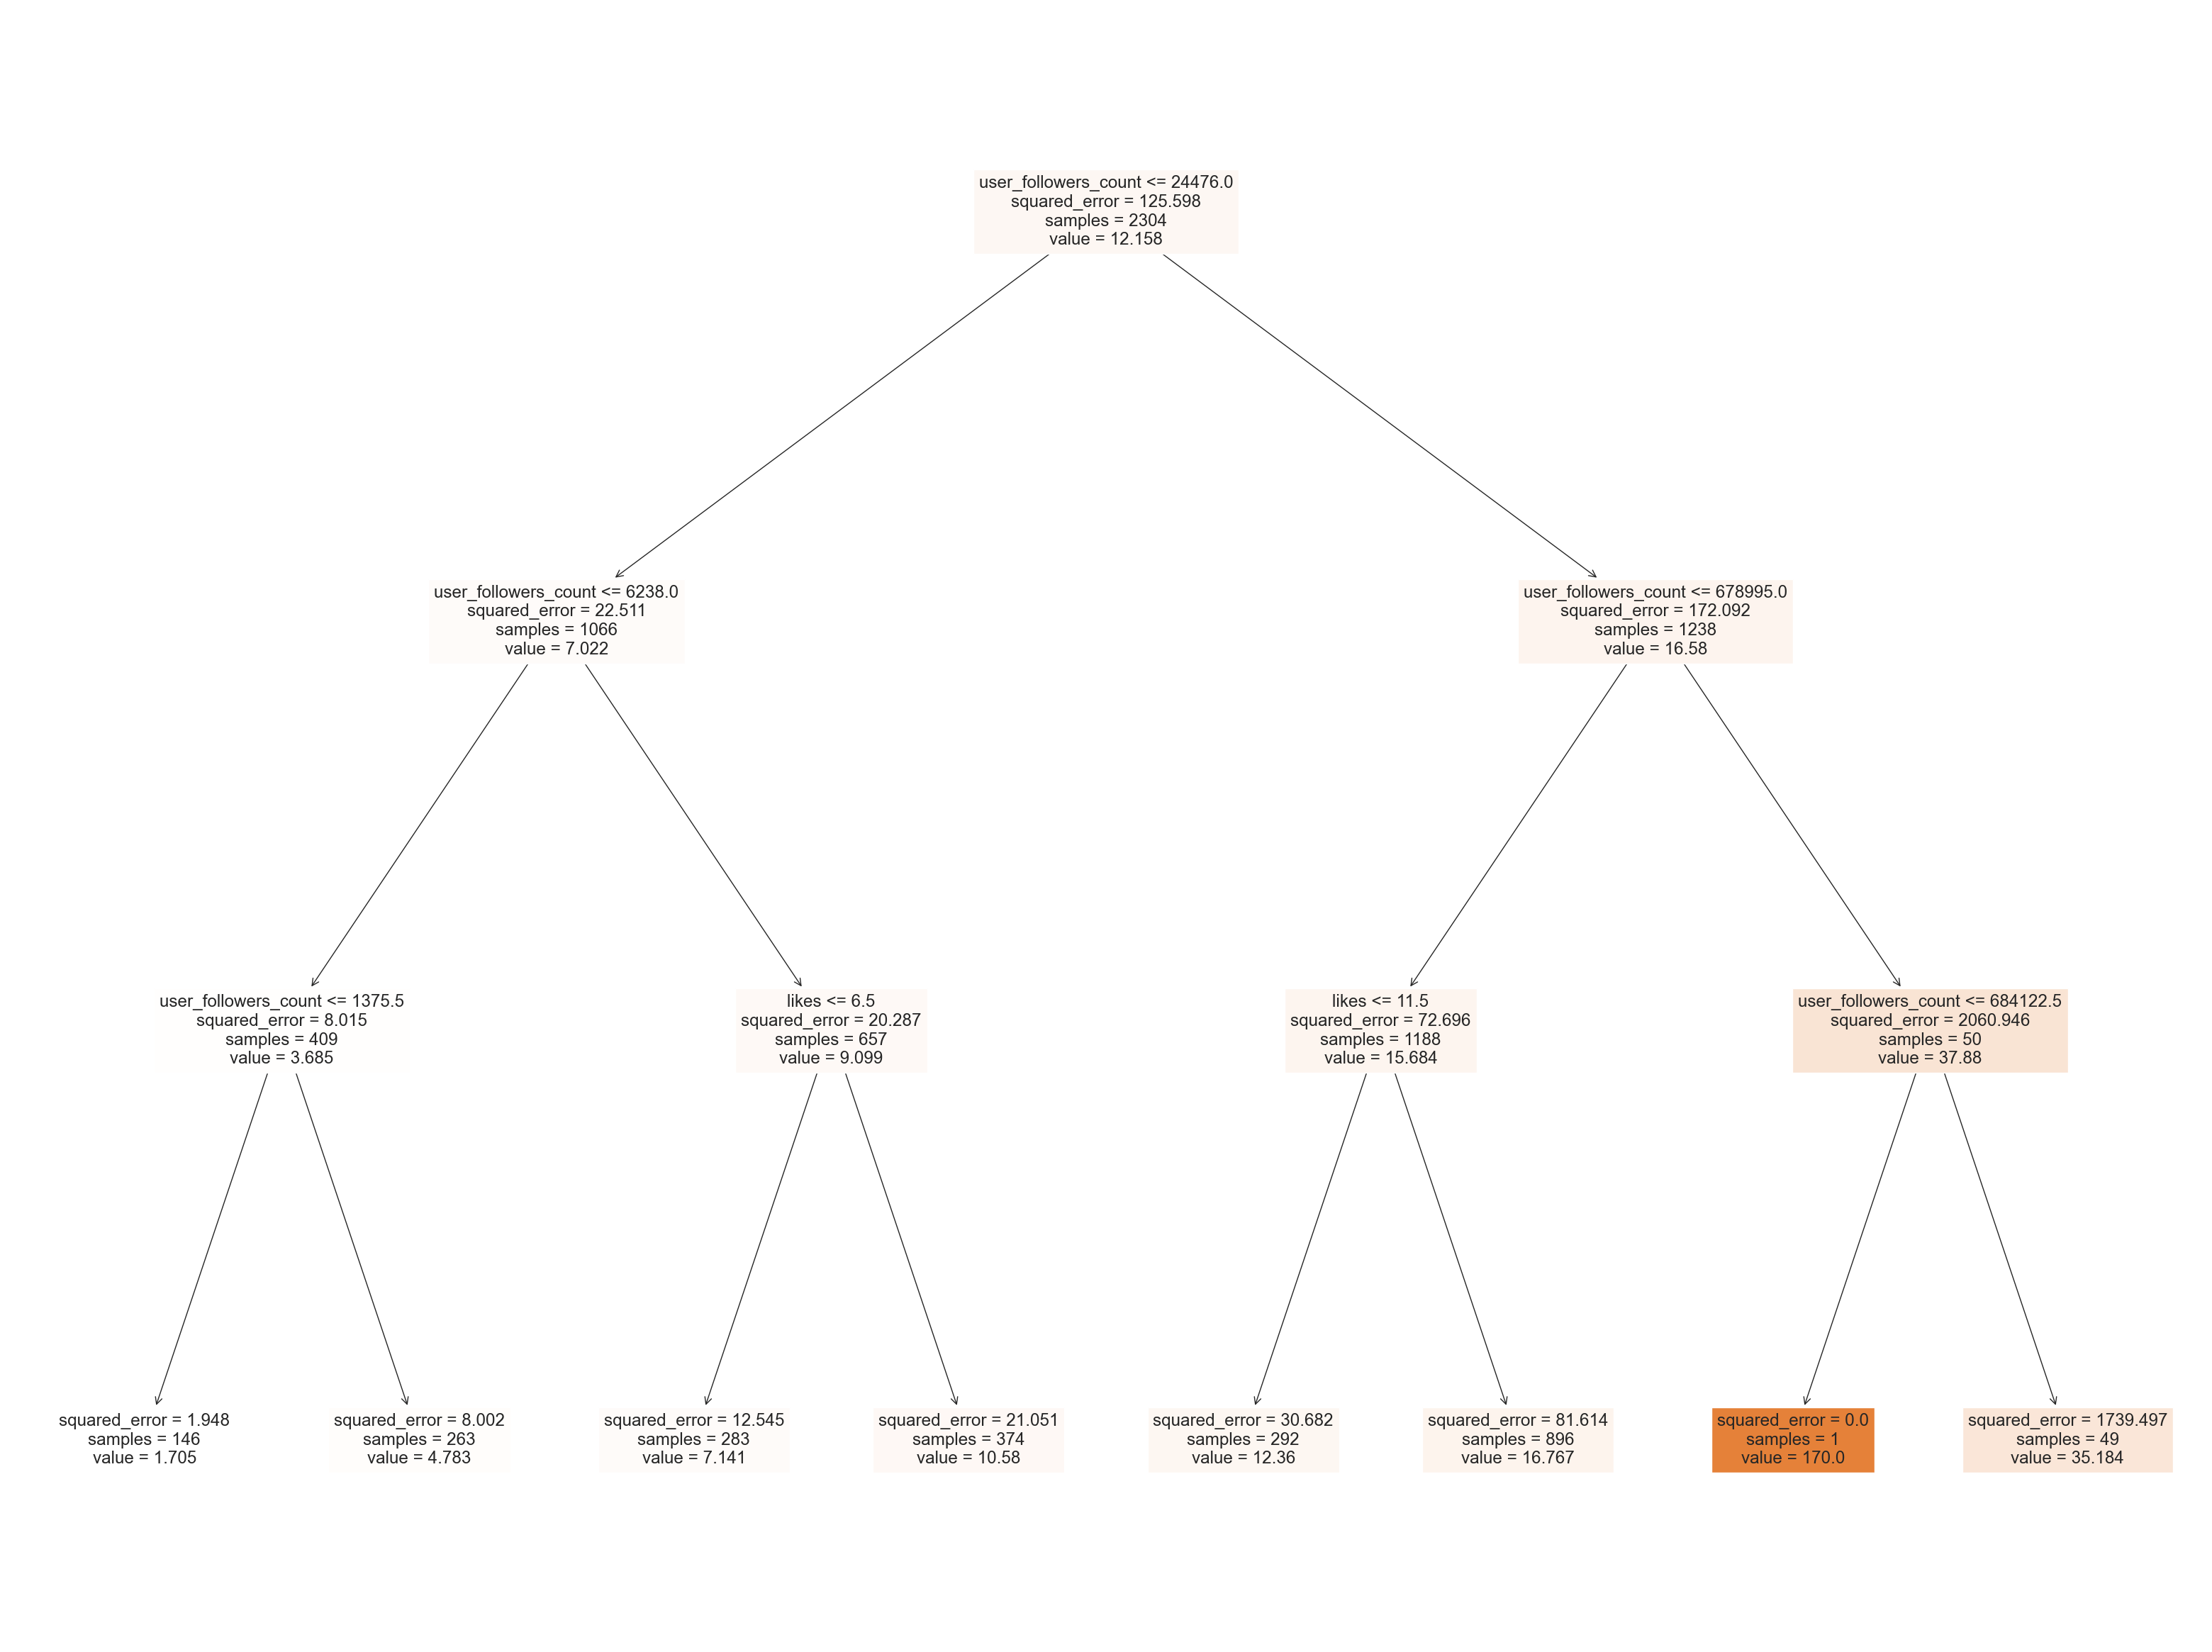

In [127]:
reg_tree_fig_1 = plt.figure(figsize=(40,30))
reg_tree_fig_1 = tree.plot_tree(tree_model_trump, feature_names=X.columns, filled=True)

##### The first regression tree below is of the positive tweets of Joe Biden. Observe that I have used the same data set the one I used linear regression for the positive tweets of Biden!

##### Moreover, I chose the max_depth of this regression tree to be equal to 3 which kept the mean-squared error the least which is also the error of prediction at about 58.6 that is quite decent given the nature of data. Similarly, the r-squared of this regression tree is equal to 0.15 indicating a positive relationship between tweet count and the other independent variables like user followers count and likes as predicted since the beginning of the project. 

In [128]:
X = time_data_opb[['retweet_count', 'likes', 'user_followers_count']]
y = time_data_opb['tweet_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

tree_model_biden = DecisionTreeRegressor(max_depth = 3)
tree_model_biden.fit(X_train, y_train)


y_pred = tree_model_biden.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

Mean Squared Error:  58.635180354618086
R-squared:  0.15383046578410975


##### The regression tree below predicts the number of tweets based on the user followers count and the number of likes tweets recieve on the previously mentioned 10 minute time interval for Joe Biden. The root node starts with dividing user followers count into less than or equal to 397978. It further divides into more conditions based on user followers count of less than or equal to 10842 and number of likes that are less than 515.5 respectively. Regression trees like the one below can capture non-linear relationships between the variables by splitting the data into subgroups like user follower count and likes. Similarly, the following regression tree captures outliers where there are only 9 (representing sample points having less than 649 likes) and 12 samples in two of the child nodes in the bottom. On the other hand, in our OLS results the r-squared value was quite low due to the outliers! Most importantly, the regression tree also shows which variable are the most important when splitting the parent node and further child nodes.

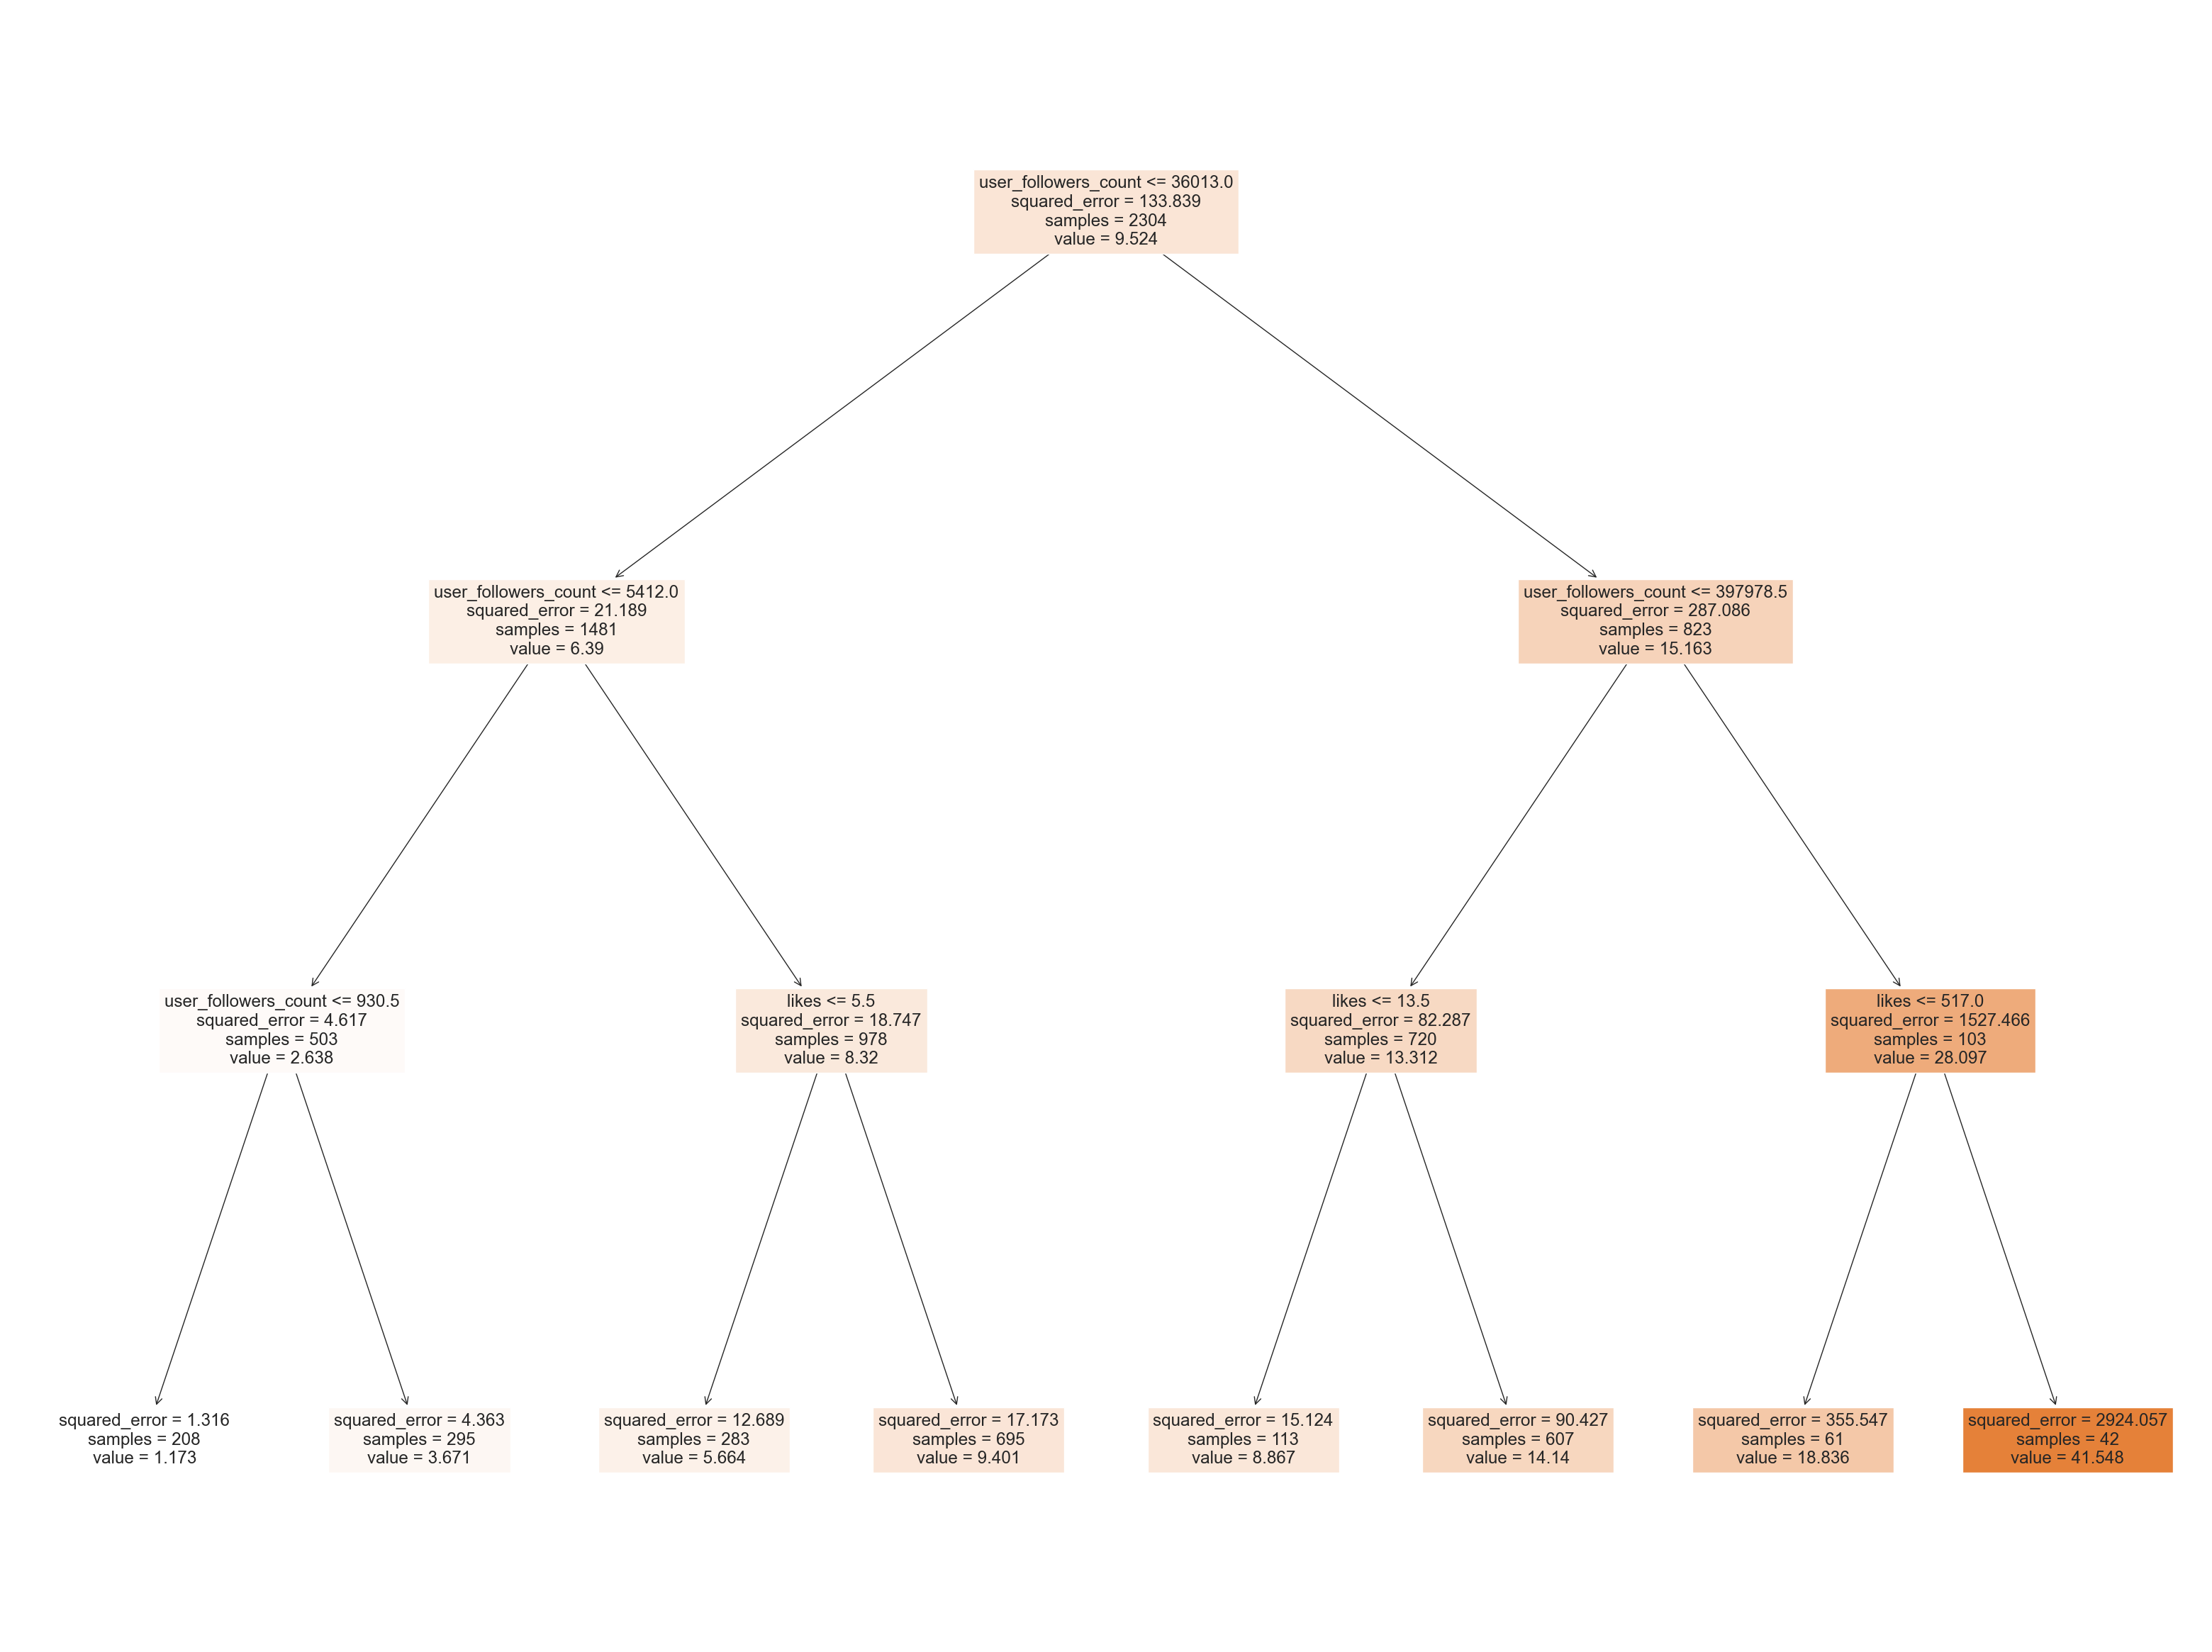

In [129]:
reg_tree_fig_2 = plt.figure(figsize=(40,30))
reg_tree_fig_2 = tree.plot_tree(tree_model_biden, feature_names=X.columns, filled=True)

### Conclusion

##### The research project pursued building a relationship between different features of a social media post that demonstrates public engagement on social media platforms like tweets on Twitter. People share their opinions in unique ways and other people engage and reciprocate those opinions in certain manners. People like tweets while others prefer retweeting them however, both serve the same purpose of engagement and spread of the particular message and idea. This activity of liking and retweeting can significantly reflect people's emotions at a certain time or in a certain region which in turn becomes a good indicator to predict the vote count and ultimately the results.
##### Sentiment Analysis helped identify which states in the US were happy to support Biden or Trump. The Statistics tables indicated on average how many people were interested in the campaign and the number of likes and retweet counts each candidate received. Moreover, the comparison of only positive tweets with regular tweets also illustrated the differences in public engagement on such tweets. 
##### The plots gave a visualization of which candidate was provoking more public engagement in certain states. In most of the States mentioned in the bar plots, Biden was the one with more engagement on Twitter due to a high number of likes and retweets. Thus, without a doubt, Biden was the final winner. Scatter plots demonstrated that vote counts and average likes had some sort of weak relation depending on the candidate. Histograms and bar plots provided us with a comparison of how the distribution of vote to population ratio differed between Trump and Biden among the states.  
##### The maps took the analysis to a much deeper level since they demonstrated how the results of many states were accurately predicted just based on the intensity of the positive or negative sentiment each candidate received in every state. The higher the positivity score or the lower the negativity score the higher the chance for the candidate to win in that state and vice versa. The maps further highlighted the tweet count proportions and voter turnout to observe how the proportions were comparable to a certain extent in each state for both candidates. One interesting pattern observed was how COVID-19 played as an external factor in favor of Biden. Given that Biden favored better health policies and reforms, states that were hit by covid given a high total number of cases up to the election date ended up voting for Biden.
##### The time-series simple moving average model was pivotal to our research which demonstrated how as we came close to the election date the negative sentiment towards Trump and the positive sentiment towards Biden increased while the negative sentiment towards Biden and positive sentiment towards Biden decreased. It was noticeable how a real-life controversy of Biden’s son during the election caused a huge upward spike in the negative sentiment towards Biden that caused the positive sentiment toward Trump rise which could have only been explained in a time-series environment. 
##### Unfortunately, the regressions performed showed a relatively low relation between the number of tweets and the engagement variables like the number of retweet counts and likes. However, in each subsequent model for all the regressions, as we increased the number of independent variables, it improved our model representing that each engagement variable had some relation even if not strong. The machine learning techniques including logistic regression models and regression trees provided us with additional data that the linear regressions couldn’t provide. The logistic regression models predicted which tweets were positive or negative and referred to which candidate. The models were about 50-60% efficient as shown by classification reports. The regression trees provided us with outliers by splitting the most important variables first depending on the data set that was provided. 
##### Nonetheless, tweet count had a strong positive relationship with the vote count for each candidate which confirmed that the tweet count was affected by external factors that were unknown within the data. This meant that further factors such as campaign funding, public rallies during the elections in the battleground states, political ideology, and other social and political factors for each candidate had to be taken into consideration and more data has to be incorporated for better results and predictions. Apart from additional data, more rigorous regression and machine learning models can be implemented to predict which candidate won in each state such as multinomial logistic regression, bootstrapping, random forest, and Naive Bayes classifiers. Such models would be much more appropriate since they use categorical variables present in the Twitter data set. Although there were some contradictions when it came to predicting states for each model we created, we were able to predict the majority of the states correctly through different models and comparisons and show how public engagement o social media posts was a good approach to predicting the political leaning and the election results.


### Bibliography

Ansari, M. Z. (2019). Analysis of Political Sentiment Orientations on Twitter. Procedia Computer Science, 1821–1828.

Coletto, M. (2015). Electoral Predictions with Twitter: A Machine Learning Approach. Venice: Research Gate.

He, Y. (2012). Quantising Opinions for Political Tweets Analysis. Istanbul: ACL Anthology.

Hui, M. (2020, November 8). US Election 2020 Tweets. Retrieved from Kaggle : https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets

Joyce, B. (2018). Sentiment Analysis of Tweets for the 2016 US Presidential Election. Greensboro: IEEE Xplore.

Khan, A. (2021, August 12). How the COVID-19 Pandemic Helped Biden Win the 2020 Presidential Primaries. Retrieved from American Political 

Science Association: https://politicalsciencenow.com/how-the-covid-19-pandemic-helped-biden-win-the-2020-presidential-primaries/

Matalon, Y. (2021). Using sentiment analysis to predict opinion inversion in Tweets of Political communication. Scientific Reports.

Mohammad, S. M. (2014). Sentiment, Emotion, Purpose, and Style in Electoral Tweets. Ottawa: National Research Council Canada.

Morris, E.-J. (2020, October 20). Smoking-gun email reveals how Hunter Biden introduced Ukrainian businessman to VP dad. Retrieved from NewYork 
Post: https://nypost.com/2020/10/14/email-reveals-how-hunter-biden-introduced-ukrainian-biz-man-to-dad/

Pota, M. (2018). A Subword-based Deep Learning Approach for Sentiment Analysis of Political Tweets . International Conference on Advanced 
Information Networking and Applications (pp. 651-656). Krakow: IEEE Xplorer.
Rodriguez-ibanez, M. (2021). Sentiment Analysis of Political Tweets From the 2019 Spanish Elections. Madrid: IEEE Access.



